### Enhancing Profitability through User Analytics in the Telecommunication Industry - A Case Study on TellCo

##### **Objective** : To conduct a comprehensive analysis of TellCo's telecommunication dataset, leveraging user analytics, with the aim of identifying growth opportunities and providing strategic recommendations for the investor to make an informed decision on whether to acquire or divest TellCo.

##### **Problem Statement**: TellCo, an established mobile service provider in the Republic of Pefkakia, has not utilized its system-generated data for business analysis. The lack of data-driven insights hinders the company's ability to identify potential areas for growth and optimize its offerings. The investor, specializing in acquiring undervalued assets, seeks to understand the fundamental strengths and weaknesses of TellCo. The challenge lies in harnessing the untapped potential within the telecommunication dataset to uncover opportunities for increasing profitability and determining the viability of acquiring TellCo

##### **Business Need** : The investor, experienced in acquiring undervalued assets, aims to replicate past successes by thoroughly analyzing TellCo's data. The previous success in the delivery industry demonstrated the significance of data-driven decision-making, resulting in a 25% profit increase within six months. Given TellCo's willingness to share financial information but lacking in data analysis, there is a crucial need to delve into the telecommunication dataset. This project seeks to provide insights into customer behavior, network activities, and potential areas for growth, ultimately aiding the investor in deciding whether to purchase or sell TellCo. The goal is to create value by transforming raw data into actionable insights through a web-based dashboard and a detailed written report.

#### Libraries are used

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


#### Data Extraction

In [4]:
telecom_data=pd.read_excel("telcom_data.xlsx")

In [74]:
telecom_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


##### Understanding DataTypes and Null Values in the Dataset 

In [6]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

##### Statistical Measures

In [7]:
telecom_data.describe().round(2)

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.00,150000.0,150000.00,1.494310e+05,1.489350e+05,1.494290e+05,122172.00,122189.00,150000.00,150000.00,...,150001.00,150001.00,150001.00,150001.00,1.500010e+05,150001.00,1.500010e+05,150001.00,150000.00,1.500000e+05
mean,499.19,498.8,104608.56,2.082016e+14,4.188282e+10,4.847455e+13,109.80,17.66,13300.05,1770.43,...,11634072.50,11009410.13,11626851.72,11001754.82,4.220447e+08,8288398.11,4.211005e+08,8264799.42,41121206.29,4.546434e+08
std,288.61,288.1,81037.62,2.148809e+10,2.447443e+12,2.241637e+13,619.78,84.79,23971.88,4625.36,...,6710568.85,6345423.35,6725218.03,6359489.76,2.439675e+08,4782699.66,2.432050e+08,4769003.69,11276386.51,2.441429e+08
min,0.00,0.0,7142.00,2.040471e+14,3.360100e+10,4.400152e+11,0.00,0.00,0.00,0.00,...,53.00,105.00,42.00,35.00,2.516000e+03,59.00,3.290000e+03,148.00,2866892.00,7.114041e+06
25%,250.00,251.0,57440.50,2.082014e+14,3.365130e+10,3.546071e+13,32.00,2.00,43.00,47.00,...,5833501.00,5517965.00,5777156.00,5475981.00,2.104733e+08,4128476.00,2.101869e+08,4145943.00,33222010.50,2.431068e+08
50%,499.00,500.0,86399.00,2.082015e+14,3.366371e+10,3.572201e+13,45.00,5.00,63.00,63.00,...,11616019.00,11013447.00,11642217.00,10996384.00,4.234081e+08,8291208.00,4.218030e+08,8267071.00,41143312.00,4.558411e+08
75%,749.00,750.0,132430.25,2.082018e+14,3.368349e+10,8.611970e+13,70.00,15.00,19710.75,1120.00,...,17448518.00,16515562.00,17470478.00,16507268.00,6.331742e+08,12431624.00,6.316918e+08,12384148.00,49034238.50,6.657055e+08
max,999.00,999.0,1859336.00,2.140743e+14,8.823971e+14,9.900120e+13,96923.00,7120.00,378160.00,58613.00,...,23259098.00,22011962.00,23259189.00,22011955.00,8.434419e+08,16558794.00,8.434425e+08,16558816.00,78331311.00,9.029696e+08


#### Number of Rows and Columns in Dataset

In [8]:

print(f" There are {telecom_data.shape[0]} rows and {telecom_data.shape[1]}.columns")

 There are 150001 rows and 55.columns


#### List of the columns in the Dataset

In [9]:
telecom_data.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb 

In [10]:
telecom_data.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

#### Finding the Missing Value in the Dataset

In [11]:
totalcolumns = np.product(telecom_data.shape)
missingcount = telecom_data.isnull().sum()
totalmissing = missingcount.sum()
print("The Telcom dataset contains", round(((totalmissing/totalcolumns)*100), 2), "%", "missing values")
print

The Telcom dataset contains 12.49 % missing values


<function print>

#### Converting Datatype from Object to Integer datatype

In [12]:
telecom_data['Bearer Id']=telecom_data['Bearer Id'].astype(object).replace('',0).astype('int64')

In [13]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  int64         
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [14]:
telecom_data.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

#### Filling NA with Mean Values

In [15]:
mean_value= telecom_data.mean()
telecom_data.fillna(mean_value, inplace = True)

C:\Users\pooji\AppData\Local\Temp\ipykernel_34516\3906621170.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_value= telecom_data.mean()
C:\Users\pooji\AppData\Local\Temp\ipykernel_34516\3906621170.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_value= telecom_data.mean()


In [16]:
telecom_data.isnull().sum()

Bearer Id                                      0
Start                                          1
Start ms                                       0
End                                            1
End ms                                         0
Dur. (ms)                                      0
IMSI                                           0
MSISDN/Number                                  0
IMEI                                           0
Last Location Name                          1153
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%) 

#### Correlation Matrix

In [18]:
correlation_matrix = telecom_data.corr()
print(correlation_matrix)

C:\Users\pooji\AppData\Local\Temp\ipykernel_29040\2872732660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = telecom_data.corr()


                                          Start ms    End ms  Dur. (ms)  \
Start ms                                  1.000000  0.120945   0.001287   
End ms                                    0.120945  1.000000  -0.001302   
Dur. (ms)                                 0.001287 -0.001302   1.000000   
IMSI                                     -0.000054  0.000328  -0.019798   
MSISDN/Number                            -0.001021 -0.001890   0.024616   
IMEI                                     -0.001133 -0.000032  -0.058043   
Avg RTT DL (ms)                           0.004141 -0.005287  -0.052472   
Avg RTT UL (ms)                          -0.002221 -0.002607  -0.002981   
Avg Bearer TP DL (kbps)                  -0.000690  0.000694  -0.165355   
Avg Bearer TP UL (kbps)                  -0.001268  0.000687  -0.113996   
TCP DL Retrans. Vol (Bytes)               0.000328  0.004941   0.018902   
TCP UL Retrans. Vol (Bytes)              -0.003581 -0.003375   0.006496   
DL TP < 50 Kbps (%)      

##### Heatmap for Correlatin Matrix

<Axes: >

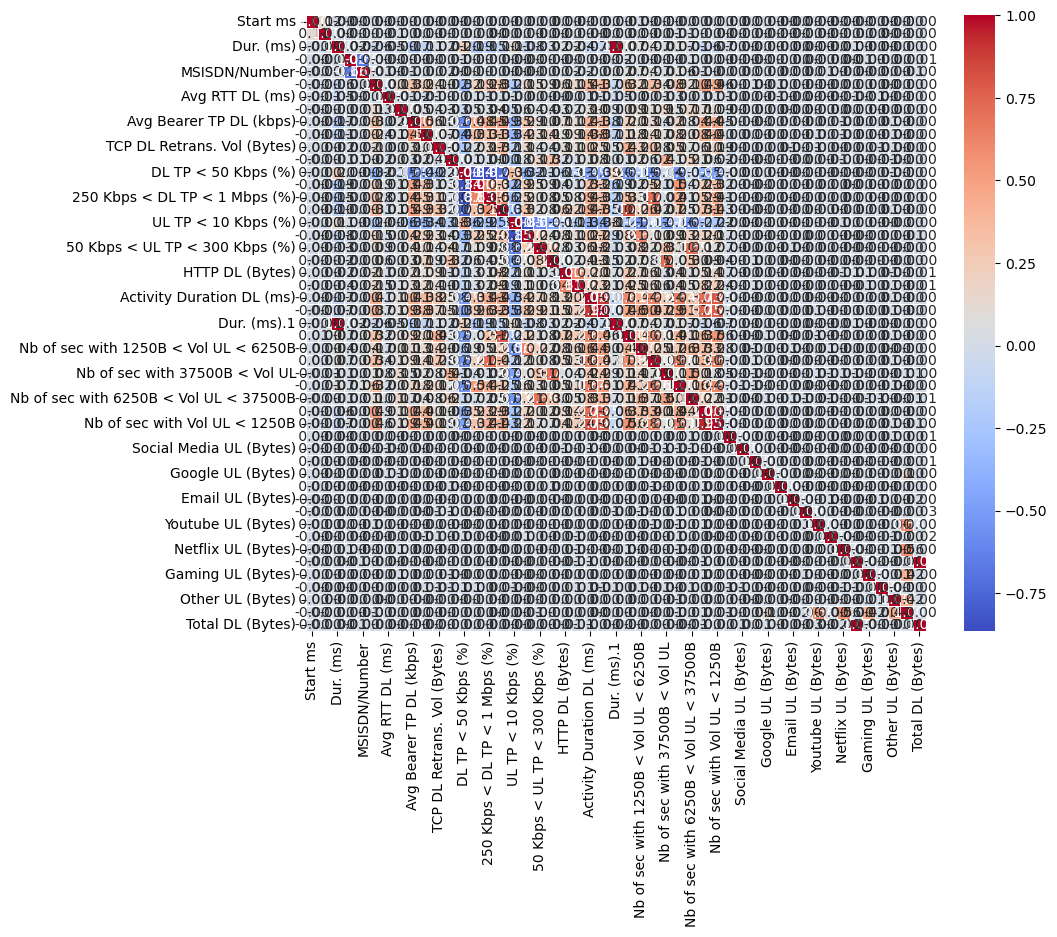

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=" .2f", linewidths=0.5)

##### ***Conclusion*** In this analysis, we visualized the correlation matrix of a large dataset using a heatmap. Due to the size of the dataset, the  correlation matrix resulted in an overwhelming visual display, making it challenging to extract meaningful insights. To enhance interpretability, we took the next step by selecting a subset of key columns for correlation analysis. This focused approach allowed for a more concise and insightful exploration of relationships between variables.  This refined analysis aims to improve our ability to derive actionable insights from the dataset, paving the way for more targeted decision-making and further exploration.

#### Selected the few coloumns for analysing the Correlation Matrix

In [22]:
selected_columns = telecom_data.iloc[:,:18]
selected_columns

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.0,0.0,52.0,65.0,NaN,NaN,100.0,0.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,27.0,2.0,23.0,54.0,NaN,NaN,100.0,0.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,43.0,6.0,43.0,47.0,NaN,NaN,100.0,0.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,37.0,5.0,34.0,37.0,NaN,NaN,100.0,0.0


In [23]:
correlation_matrix = selected_columns.corr()
correlation_matrix

C:\Users\pooji\AppData\Local\Temp\ipykernel_29040\80350735.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_columns.corr()


,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%)
Start ms,1.000000,0.120945,0.001287,-0.000054,-0.001021,-0.001133,0.004141,-0.002221,-0.000690,-0.001268,0.000328,-0.003581,0.000720,-0.003107
End ms,0.120945,1.000000,-0.001302,0.000328,-0.001890,-0.000032,-0.005287,-0.002607,0.000694,0.000687,0.004941,-0.003375,-0.003683,0.004041
Dur. (ms),0.001287,-0.001302,1.000000,-0.019798,0.024616,-0.058043,-0.052472,-0.002981,-0.165355,-0.113996,0.018902,0.006496,0.197410,-0.193948
IMSI,-0.000054,0.000328,-0.019798,1.000000,-0.662558,-0.000536,-0.000365,-0.000437,-0.000557,-0.000269,-0.003147,-0.005253,0.000604,-0.000515
MSISDN/Number,-0.001021,-0.001890,0.024616,-0.662558,1.000000,0.005703,-0.001701,0.008404,-0.001857,-0.001278,0.020756,0.003438,0.001840,-0.001656
IMEI,-0.001133,-0.000032,-0.058043,-0.000536,0.005703,1.000000,-0.003732,0.134446,0.301312,0.240492,0.103018,0.024287,-0.318413,0.186724
Avg RTT DL (ms),0.004141,-0.005287,-0.052472,-0.000365,-0.001701,-0.003732,1.000000,0.007867,-0.022698,-0.011409,-0.004757,-0.001843,-0.007646,0.014444
Avg RTT UL (ms),-0.002221,-0.002607,-0.002981,-0.000437,0.008404,0.134446,0.007867,1.000000,0.053914,0.042500,0.025410,0.034791,-0.050171,0.025696
Avg Bearer TP DL (kbps),-0.000690,0.000694,-0.165355,-0.000557,-0.001857,0.301312,-0.022698,0.053914,1.000000,0.557282,0.097056,0.015512,-0.603913,0.475085
Avg Bearer TP UL (kbps),-0.001268,0.000687,-0.113996,-0.000269,-0.001278,0.240492,-0.011409,0.042500,0.557282,1.000000,0.065328,0.035667,-0.401217,0.308153


#### Heat map for Correlation Matrix for selected columns

<Axes: >

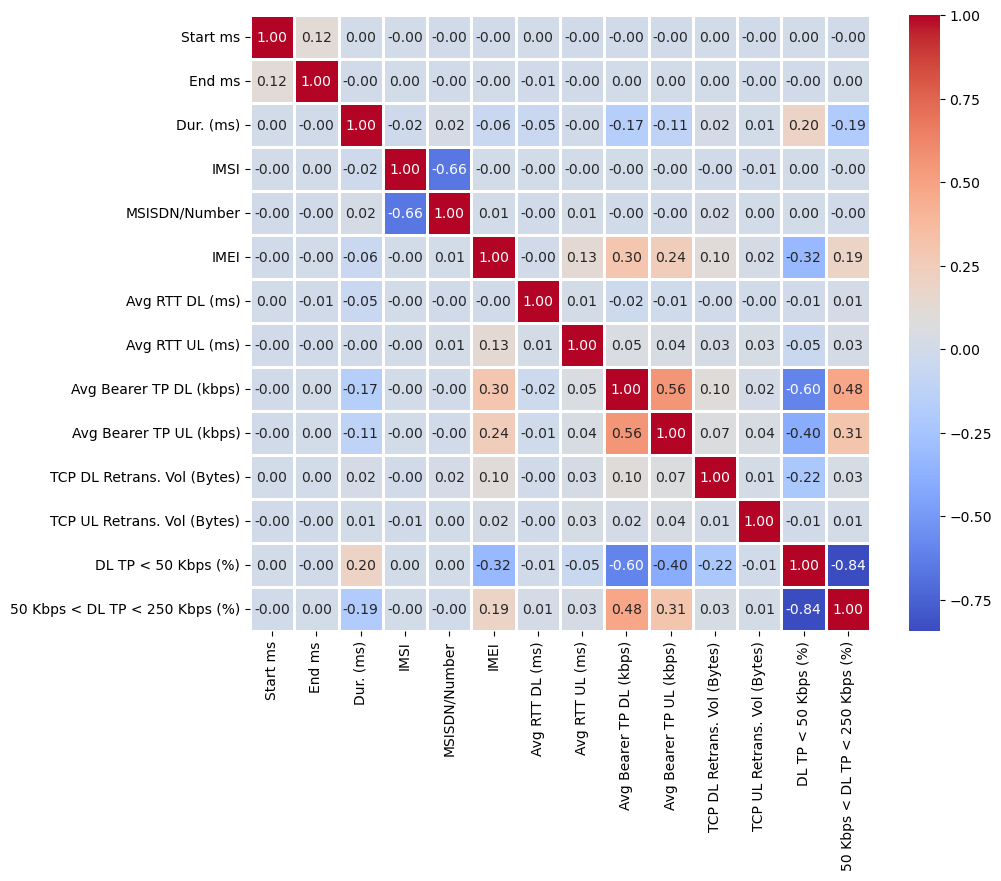

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt=".2f", linewidths = 0.8)

##### The heatmap visualization of the correlation matrix reveals significant correlations among specific performance metrics. Notably, 'Avg bearer tpt UL (kbps)' and 'Avg bearer tpt DL (kbps)' exhibit a high positive correlation, suggesting a strong relationship between uplink and downlink throughput. Additionally, the metric '50 Kbps < UL TP < 300 Kbps (%)' displays a notable positive correlation with both 'Avg bearer tpt UL (kbps)' and 'Avg bearer tpt DL (kbps)'. This correlation pattern indicates that variations in uplink and downlink throughputs align with changes in the percentage of throughput within the specified range. These insights highlight potential dependencies and interactions between these key performance indicators, emphasizing the importance of further exploration to gain a deeper understanding of the underlying factors influencing network performance

#### Groupby Fuction 

In [22]:
groupby_day = telecom_data.groupby(telecom_data['Start'].dt.date)['Dur. (ms)'].mean()
groupby_day

Start
2019-04-04    1.823652e+06
2019-04-09    1.568695e+06
2019-04-10    1.576474e+06
2019-04-11    1.413815e+06
2019-04-12    1.259719e+06
2019-04-13    1.117852e+06
2019-04-14    1.133343e+06
2019-04-15    1.002103e+06
2019-04-16    9.456216e+05
2019-04-17    8.447212e+05
2019-04-18    7.479097e+05
2019-04-19    6.668939e+05
2019-04-20    5.846175e+05
2019-04-21    4.822479e+05
2019-04-22    3.707696e+05
2019-04-23    2.599910e+05
2019-04-24    7.215502e+04
2019-04-25    1.178150e+05
2019-04-26    1.168769e+05
2019-04-27    8.786364e+04
2019-04-28    1.178556e+05
2019-04-29    9.107503e+04
Name: Dur. (ms), dtype: float64

##### Groupby for Total UL and Total DL

In [23]:

groupby_user = telecom_data.groupby('IMSI')['Total UL (Bytes)','Total DL (Bytes)'].sum()
groupby_user

C:\Users\pooji\AppData\Local\Temp\ipykernel_34516\3503003995.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupby_user = telecom_data.groupby('IMSI')['Total UL (Bytes)','Total DL (Bytes)'].sum()


,Total UL (Bytes),Total DL (Bytes)
IMSI,,
2.040471e+14,60456049.0,78697597.0
2.040808e+14,37295915.0,194828056.0
2.082001e+14,53794658.0,31376981.0
2.082001e+14,33583272.0,392918313.0
2.082001e+14,71325004.0,961767023.0
...,...,...
2.082099e+14,33888182.0,688815403.0
2.082099e+14,44692550.0,451173021.0
2.082099e+14,30355487.0,307825104.0


#### Group by with columns of interest

In [8]:
columns_of_interest = ['MSISDN/Number', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                        'Google DL (Bytes)', 'Google UL (Bytes)',
                        'Email DL (Bytes)', 'Email UL (Bytes)',
                        'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                        'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                        'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                        'Other DL (Bytes)', 'Other UL (Bytes)',
                        'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']

In [9]:
user_data = telecom_data[columns_of_interest].copy()

#### Aggregating the Columns of Interest

In [26]:
aggregated_data = user_data.groupby('MSISDN/Number').agg({
    'Dur. (ms)': ['count', 'sum'],
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',  
}).reset_index()

In [27]:
aggregated_data

MSISDN/Number Dur. (ms)               Total DL (Bytes) Total UL (Bytes)
                         count           sum              sum              sum
0       3.360100e+10         1  1.167200e+05     8.426375e+08     3.605311e+07
1       3.360100e+10         1  1.812300e+05     1.207552e+08     3.610446e+07
2       3.360100e+10         1  1.349690e+05     5.566597e+08     3.930682e+07
3       3.360101e+10         1  4.987800e+04     4.019932e+08     2.032753e+07
4       3.360101e+10         2  3.710400e+04     1.363130e+09     9.428053e+07
...              ...       ...           ...              ...              ...
106852  3.379000e+10         1  1.409880e+05     4.445751e+08     3.573224e+07
106853  4.188282e+10      1066  7.255100e+07     4.873783e+11     4.436642e+10
106854  3.197021e+12         1  8.773850e+05     1.948281e+08     3.729592e+07
106855  3.370000e+14         1  2.530300e+05     5.396350e+08     5.665284e+07
106856  8.823971e+14         1  8.698440e+05     7.869760e+07     6.045605e+07

[106857 rows x 5 columns]

In [28]:
user_data

,MSISDN/Number,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Dur. (ms),Total DL (Bytes),Total UL (Bytes)
0,3.366496e+10,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,1.823652e+06,3.088796e+08,3.674974e+07
1,3.368185e+10,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,1.365104e+06,6.533850e+08,5.380039e+07
2,3.376063e+10,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,1.361762e+06,2.798073e+08,2.788364e+07
3,3.375034e+10,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,1.321509e+06,8.460285e+08,4.332422e+07
4,3.369980e+10,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,1.089009e+06,5.691386e+08,3.854281e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,3.365069e+10,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,8.123000e+04,5.741753e+08,5.762885e+07
149997,3.366345e+10,2.344568e+06,7613.00000,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,9.797000e+04,6.666488e+08,3.913508e+07
149998,3.362189e+10,1.245845e+06,14394.00000,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,9.824900e+04,5.927864e+08,3.491222e+07
149999,3.361962e+10,8.015470e+05,21562.00000,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,9.791000e+04,3.718959e+08,2.962610e+07


#### Finding null value after Aggregate 

In [29]:
user_data.isnull().sum()

MSISDN/Number              0
Social Media DL (Bytes)    0
Social Media UL (Bytes)    0
Google DL (Bytes)          0
Google UL (Bytes)          0
Email DL (Bytes)           0
Email UL (Bytes)           0
Youtube DL (Bytes)         0
Youtube UL (Bytes)         0
Netflix DL (Bytes)         0
Netflix UL (Bytes)         0
Gaming DL (Bytes)          0
Gaming UL (Bytes)          0
Other DL (Bytes)           0
Other UL (Bytes)           0
Dur. (ms)                  0
Total DL (Bytes)           0
Total UL (Bytes)           0
dtype: int64

In [30]:
user_data.describe().round(2)

,MSISDN/Number,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Dur. (ms),Total DL (Bytes),Total UL (Bytes)
count,1.500010e+05,150001.00,150001.00,150001.00,150001.00,150001.00,150001.00,150001.00,150001.00,150001.00,150001.00,1.500010e+05,150001.00,1.500010e+05,150001.00,150001.00,1.500010e+05,150001.00
mean,4.188282e+10,1795321.77,32928.43,5750752.62,2056541.93,1791728.87,467373.44,11634072.50,11009410.13,11626851.72,11001754.82,4.220447e+08,8288398.11,4.211005e+08,8264799.42,104608.56,4.546434e+08,41121206.29
std,2.438731e+12,1035482.28,19006.18,3309097.02,1189916.93,1035839.51,269969.31,6710568.85,6345423.35,6725218.03,6359489.76,2.439675e+08,4782699.66,2.432050e+08,4769003.69,81037.35,2.441421e+08,11276348.93
min,3.360100e+10,12.00,0.00,207.00,3.00,14.00,2.00,53.00,105.00,42.00,35.00,2.516000e+03,59.00,3.290000e+03,148.00,7142.00,7.114041e+06,2866892.00
25%,3.365151e+10,899148.00,16448.00,2882393.00,1024279.00,892793.00,233383.00,5833501.00,5517965.00,5777156.00,5475981.00,2.104733e+08,4128476.00,2.101869e+08,4145943.00,57442.00,2.431072e+08,33222029.00
50%,3.366380e+10,1794369.00,32920.00,5765829.00,2054573.00,1793505.00,466250.00,11616019.00,11013447.00,11642217.00,10996384.00,4.234081e+08,8291208.00,4.218030e+08,8267071.00,86399.00,4.558409e+08,41143242.00
75%,3.368473e+10,2694938.00,49334.00,8623552.00,3088454.00,2689327.00,700440.00,17448518.00,16515562.00,17470478.00,16507268.00,6.331742e+08,12431624.00,6.316918e+08,12384148.00,132430.00,6.657051e+08,49034238.00
max,8.823971e+14,3586064.00,65870.00,11462832.00,4121357.00,3586146.00,936418.00,23259098.00,22011962.00,23259189.00,22011955.00,8.434419e+08,16558794.00,8.434425e+08,16558816.00,1859336.00,9.029696e+08,78331311.00


Conclusion & Interpretation: 

Number of xDR Sessions:
The dataset comprises a wide range of xDR sessions, with a mean of approximately 1,404 sessions. The majority of sessions fall within the lower quartile (25th percentile), with a median (50th percentile) of 1,027 sessions and a maximum of 1,066 sessions.

Session Duration:
The average session duration is approximately 146.8 million milliseconds (about 40.8 hours), with a broad range from a minimum of 7.14 million milliseconds to a maximum of 72.55 billion milliseconds. The standard deviation is relatively high (289.5 million milliseconds), indicating significant variability in session durations.

Data Volume (DL and UL):
Total DL and UL data volumes exhibit large ranges, with means of approximately 638.2 million and 57.7 million bytes, respectively. Substantial standard deviations (1.56 billion for DL and 140.2 million for UL) suggest considerable variability in data consumption.

Application-Specific Data:
Differentiated by application type, social media, Google, email, YouTube, Netflix, gaming, and other data show diverse patterns with varying means, standard deviations, and percentiles. High standard deviations in certain applications (e.g., gaming) indicate significant variability in data consumption for those applications.

In [31]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MSISDN/Number            150001 non-null  float64
 1   Social Media DL (Bytes)  150001 non-null  float64
 2   Social Media UL (Bytes)  150001 non-null  float64
 3   Google DL (Bytes)        150001 non-null  float64
 4   Google UL (Bytes)        150001 non-null  float64
 5   Email DL (Bytes)         150001 non-null  float64
 6   Email UL (Bytes)         150001 non-null  float64
 7   Youtube DL (Bytes)       150001 non-null  float64
 8   Youtube UL (Bytes)       150001 non-null  float64
 9   Netflix DL (Bytes)       150001 non-null  float64
 10  Netflix UL (Bytes)       150001 non-null  float64
 11  Gaming DL (Bytes)        150001 non-null  float64
 12  Gaming UL (Bytes)        150001 non-null  float64
 13  Other DL (Bytes)         150001 non-null  float64
 14  Othe

#### Top 10 handsets used by cusotmers

In [32]:
Top_10_handsets=telecom_data.groupby('Handset Type')['MSISDN/Number'].count().sort_values(ascending=False)
Top_10_handsets.head(10)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: MSISDN/Number, dtype: int64

##### ***Conclusion***:
##### In analyzing the data, it is evident that the top 10 handsets preferred by customers encompass a variety of popular models. The Huawei B528S-23A emerges as the most widely used handset, with a substantial count of 19,752 occurrences. Following closely are Apple iPhone models, including the iPhone 6S (A1688), iPhone 6 (A1586), iPhone 7 (A1778), iPhone SE (A1723), iPhone 8 (A1905), iPhone XR (A2105), and iPhone X (A1901), each contributing significantly to customer device choices. 
##### The presence of 'undefined' in the dataset suggests a category where the handset type may not be explicitly identified. This analysis provides valuable insights into the popularity of specific handset models among customers, which can be crucial for businesses in tailoring their services and optimizing user experiences

#### Top 3 Handset Manufacturers

In [80]:
Top_3_handset_Manufacturers=telecom_data.groupby('Handset Manufacturer')['MSISDN/Number'].count().sort_values(ascending=False).head(3)
Top_3_handset_Manufacturers

Handset Manufacturer
Apple      59464
Samsung    40579
Huawei     34366
Name: MSISDN/Number, dtype: int64

#### **Conclusion:**
##### Apple, Samsung, and Huawei are the top three handset manufacturers in the dataset, with Apple having the highest representation.
##### The dataset is dominated by devices from these three manufacturers.

#### TOP 5 Handsets per TOP 3 Handset Manufacturers

In [34]:
filtered_data = telecom_data[telecom_data['Handset Manufacturer'].isin(Top_3_handset_Manufacturers.index)]

top_5_handsets_per_manufacturer = filtered_data.groupby(['Handset Manufacturer', 'Handset Type'])['MSISDN/Number'].count().groupby('Handset Manufacturer', group_keys=False).nlargest(5)

print(top_5_handsets_per_manufacturer)

Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: MSISDN/Numb

##### In examining the dataset, it is apparent that the top three handset manufacturers driving customer preferences are Apple, Huawei, and Samsung. 

#### Recommendation to Marketing Teams:

##### Apple:
The Apple iPhone 6S (A1688) and iPhone 6 (A1586) are the most popular models, with approximately 9419 and 9023 occurrences, respectively.
Consider focusing marketing efforts on these two models due to their high user adoption.

##### Huawei:
The Huawei B528S-23A stands out with a significantly higher count (19752) compared to other models.
Consider emphasizing promotions or campaigns related to the Huawei B528S-23A to leverage its popularity.

##### Samsung:
The Samsung Galaxy S8 (Sm-G950F) and Galaxy A5 Sm-A520F are among the top-performing models with 4520 and 3724 occurrences, respectively.
Tailor marketing strategies to highlight these models, as they have shown strong user engagement.

Overall, understanding the popularity of specific handset models within each manufacturer allows marketing teams to target their promotions effectively. It is crucial to align marketing efforts with the preferences and behaviors of users to maximize impact and drive brand loyalty. Regularly monitoring and updating strategies based on changing trends in handset usage can further enhance marketing effectiveness.


#### Describe the relevant variable and associated data type

In [35]:
telecom_data.dtypes.reset_index()

,index,0
0,Bearer Id,int64
1,Start,datetime64[ns]
2,Start ms,float64
3,End,datetime64[ns]
4,End ms,float64
5,Dur. (ms),float64
6,IMSI,float64
7,MSISDN/Number,float64
8,IMEI,float64
9,Last Location Name,object


#### Basic Metrics

In [39]:
telecom_data.describe().round(2)

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.00,150001.0,150001.00,1.500010e+05,1.500010e+05,1.500010e+05,150001.00,150001.00,150001.00,...,150001.00,150001.00,150001.00,150001.00,1.500010e+05,150001.00,1.500010e+05,150001.00,150001.00,1.500010e+05
mean,1.039933e+18,499.19,498.8,104608.56,2.082016e+14,4.188282e+10,4.847455e+13,109.80,17.66,13300.05,...,11634072.50,11009410.13,11626851.72,11001754.82,4.220447e+08,8288398.11,4.211005e+08,8264799.42,41121206.29,4.546434e+08
std,6.310969e+18,288.61,288.1,81037.35,2.144722e+10,2.438731e+12,2.237359e+13,559.34,76.53,23971.80,...,6710568.85,6345423.35,6725218.03,6359489.76,2.439675e+08,4782699.66,2.432050e+08,4769003.69,11276348.93,2.441421e+08
min,-5.764606e+18,0.00,0.0,7142.00,2.040471e+14,3.360100e+10,4.400152e+11,0.00,0.00,0.00,...,53.00,105.00,42.00,35.00,2.516000e+03,59.00,3.290000e+03,148.00,2866892.00,7.114041e+06
25%,-5.404318e+18,250.00,251.0,57442.00,2.082014e+14,3.365151e+10,3.546261e+13,35.00,3.00,43.00,...,5833501.00,5517965.00,5777156.00,5475981.00,2.104733e+08,4128476.00,2.101869e+08,4145943.00,33222029.00,2.431072e+08
50%,6.917538e+18,499.00,500.0,86399.00,2.082015e+14,3.366380e+10,3.572241e+13,54.00,7.00,63.00,...,11616019.00,11013447.00,11642217.00,10996384.00,4.234081e+08,8291208.00,4.218030e+08,8267071.00,41143242.00,4.558409e+08
75%,7.349883e+18,749.00,750.0,132430.00,2.082018e+14,3.368473e+10,8.611970e+13,109.80,17.66,19710.00,...,17448518.00,16515562.00,17470478.00,16507268.00,6.331742e+08,12431624.00,6.316918e+08,12384148.00,49034238.00,6.657051e+08
max,7.566056e+18,999.00,999.0,1859336.00,2.140743e+14,8.823971e+14,9.900120e+13,96923.00,7120.00,378160.00,...,23259098.00,22011962.00,23259189.00,22011955.00,8.434419e+08,16558794.00,8.434425e+08,16558816.00,78331311.00,9.029696e+08


Conclusion & Interpretation:

Number of xDR Sessions:
The dataset comprises a wide range of xDR sessions, with a mean of approximately 1,404 sessions. The majority of sessions fall within the lower quartile (25th percentile), with a median (50th percentile) of 1,027 sessions and a maximum of 1,066 sessions.

Session Duration:
The average session duration is approximately 146.8 million milliseconds (about 40.8 hours), with a broad range from a minimum of 7.14 million milliseconds to a maximum of 72.55 billion milliseconds. The standard deviation is relatively high (289.5 million milliseconds), indicating significant variability in session durations.

Data Volume (DL and UL):
Total DL and UL data volumes exhibit large ranges, with means of approximately 638.2 million and 57.7 million bytes, respectively. Substantial standard deviations (1.56 billion for DL and 140.2 million for UL) suggest considerable variability in data consumption.

Application-Specific Data:
Differentiated by application type, social media, Google, email, YouTube, Netflix, gaming, and other data show diverse patterns with varying means, standard deviations, and percentiles. High standard deviations in certain applications (e.g., gaming) indicate significant variability in data consumption for those applications.

#### Median

In [5]:
telecom_data.median()

C:\Users\pooji\AppData\Local\Temp\ipykernel_27508\2022705958.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  telecom_data.median()
C:\Users\pooji\AppData\Local\Temp\ipykernel_27508\2022705958.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  telecom_data.median()


Start ms                                    4.990000e+02
End ms                                      5.000000e+02
Dur. (ms)                                   8.639900e+04
IMSI                                        2.082015e+14
MSISDN/Number                               3.366371e+10
IMEI                                        3.572201e+13
Avg RTT DL (ms)                             4.500000e+01
Avg RTT UL (ms)                             5.000000e+00
Avg Bearer TP DL (kbps)                     6.300000e+01
Avg Bearer TP UL (kbps)                     6.300000e+01
TCP DL Retrans. Vol (Bytes)                 5.687300e+05
TCP UL Retrans. Vol (Bytes)                 2.094950e+04
DL TP < 50 Kbps (%)                         1.000000e+02
50 Kbps < DL TP < 250 Kbps (%)              0.000000e+00
250 Kbps < DL TP < 1 Mbps (%)               0.000000e+00
DL TP > 1 Mbps (%)                          0.000000e+00
UL TP < 10 Kbps (%)                         1.000000e+02
10 Kbps < UL TP < 50 Kbps (%)  

Conclusion
Number of xDR Sessions:
The median number of xDR sessions is 1, indicating that half of the sessions have this or fewer sessions.

Session Duration:
The median session duration is approximately 102.7 million milliseconds (about 28.5 hours), suggesting that half of the sessions have durations less than or equal to this value.

Data Volume (DL and UL):
Median values for Total DL and UL data volumes are approximately 570.4 million and 46.8 million bytes, respectively.

Application-Specific Data:
Median values for various application-specific data, such as social media, Google, email, YouTube, Netflix, gaming, and other categories, provide insights into typical consumption levels for these applications.

Interpretation:

Session Characteristics: The median values provide a central tendency for understanding typical session attributes, such as duration and data volumes.

Application-Specific Insights: Median values for different applications help identify the central point around which users typically consume data for each application type.

User Behavior: Understanding median values is essential for gaining insights into average user behaviors, aiding in network optimization and service improvement.

#### Mode

In [7]:
telecom_data.mode().iloc[0]

Bearer Id                                                      
Start                                       2019-04-29 07:08:38
Start ms                                                  341.0
End                                         2019-04-25 00:01:32
End ms                                                    872.0
Dur. (ms)                                               86399.0
IMSI                                          208201402778052.0
MSISDN/Number                                     33626320676.0
IMEI                                           35182310355840.0
Last Location Name                                      D41377B
Avg RTT DL (ms)                                            28.0
Avg RTT UL (ms)                                             5.0
Avg Bearer TP DL (kbps)                                    23.0
Avg Bearer TP UL (kbps)                                    40.0
TCP DL Retrans. Vol (Bytes)                              1330.0
TCP UL Retrans. Vol (Bytes)             

Conclusion
Number of xDR Sessions:
The mode (most frequently occurring value) for the number of xDR sessions is 1, indicating that the majority of sessions have one session.

Session Duration:
The mode session duration is approximately 86.4 million milliseconds (about 24 hours), suggesting that this duration is the most common among sessions.

Data Volume (DL and UL):
Mode values for Total DL and UL data volumes are approximately 502.5 million and 20.4 million bytes, respectively.

Application-Specific Data:
Mode values for various application-specific data, such as social media, Google, email, YouTube, Netflix, gaming, and other categories, represent the most frequently occurring data volumes for these applications.

Interpretation:

Most Common Session Characteristics: The mode values provide insights into the most common attributes of xDR sessions, such as duration and data volumes.

Peak Usage for Applications: Mode values for application-specific data indicate the data volumes that occur most frequently for each application type, reflecting peak usage scenarios.

Network Resource Planning: Understanding mode values is valuable for planning network resources based on the most common user behaviors and application usage patterns.

#### Range of Values (Maximum - Minimum)

In [8]:
range_values1 = telecom_data.max() - telecom_data.min()
range_values1

C:\Users\pooji\AppData\Local\Temp\ipykernel_27508\2750550543.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  range_values1 = telecom_data.max() - telecom_data.min()
C:\Users\pooji\AppData\Local\Temp\ipykernel_27508\2750550543.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  range_values1 = telecom_data.max() - telecom_data.min()


Start                                        24 days 19:27:25
Start ms                                                999.0
End                                           6 days 00:59:29
End ms                                                  999.0
Dur. (ms)                                           1852194.0
IMSI                                         10027194860177.0
MSISDN/Number                               882363507487729.0
IMEI                                         98561186125774.0
Avg RTT DL (ms)                                       96923.0
Avg RTT UL (ms)                                        7120.0
Avg Bearer TP DL (kbps)                              378160.0
Avg Bearer TP UL (kbps)                               58613.0
TCP DL Retrans. Vol (Bytes)                      4294425568.0
TCP UL Retrans. Vol (Bytes)                      2908226005.0
DL TP < 50 Kbps (%)                                     100.0
50 Kbps < DL TP < 250 Kbps (%)                           93.0
250 Kbps

Conclusion
Number of xDR Sessions:
The range for the number of xDR sessions is from 1 to 1,065, indicating a wide variation in the number of sessions across the dataset.

Session Duration:
The range for session duration is substantial, ranging from 7.14 million milliseconds to 72.55 billion milliseconds.

Data Volume (DL and UL):
Considerable ranges are observed for Total DL and UL data volumes, indicating significant variability in data consumption across sessions.

Application-Specific Data:
Application-specific data also exhibits wide ranges, emphasizing the diversity in data usage patterns for different applications.

Interpretation:

Session Variation: The large range for session-related metrics highlights the diverse nature of user interactions and behaviors within the dataset.

Data Consumption Diversity: The considerable ranges in data volumes emphasize the variability in how users engage with different applications and consume data.

Resource Planning Implications: Understanding the extensive ranges is crucial for resource planning, indicating the need for flexibility in network capacity and service provisioning to accommodate various usage scenarios.

#### Summary Statistics for Selected Network Usage Categories

In [307]:
from tabulate import tabulate

selected_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                    'Google DL (Bytes)', 'Google UL (Bytes)',
                    'Email DL (Bytes)', 'Email UL (Bytes)',
                    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                    'Gaming DL (Bytes)', 'Gaming UL (Bytes)']

selected_describe = telecom_data[selected_columns].describe().round(2)

print(tabulate(selected_describe, headers='keys', tablefmt='pretty'))

+-------+-------------------------+-------------------------+-------------------+-------------------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+
|       | Social Media DL (Bytes) | Social Media UL (Bytes) | Google DL (Bytes) | Google UL (Bytes) | Email DL (Bytes) | Email UL (Bytes) | Youtube DL (Bytes) | Youtube UL (Bytes) | Netflix DL (Bytes) | Netflix UL (Bytes) | Gaming DL (Bytes) | Gaming UL (Bytes) |
+-------+-------------------------+-------------------------+-------------------+-------------------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+
| count |        150001.0         |        150001.0         |     150001.0      |     150001.0      |     150001.0     |     150001.0     |      150001.0      |      150001.0      |      150001.0      |      

#### Number of xDR Sessions

In [70]:
unique_sessions = telecom_data['Bearer Id'].nunique()

number_of_xdr_sessions = telecom_data['Bearer Id'].count()
print("Unique Sessions:", unique_sessions)
print("Number of xDR Sessions:", number_of_xdr_sessions)

xdr_sessions_stats = telecom_data['Bearer Id'].describe()

print("\nSession Count Statistics:")
print(xdr_sessions_stats)


Unique Sessions: 134709
Number of xDR Sessions: 150001

Session Count Statistics:
count     150001
unique    134709
top             
freq         991
Name: Bearer Id, dtype: object


In [71]:
unique_sessions = telecom_data['Bearer Id'].nunique()

number_of_xdr_sessions = telecom_data['Bearer Id'].count()

print("Unique Sessions:", unique_sessions)
print("Number of xDR Sessions:", number_of_xdr_sessions)

xdr_sessions_df = pd.DataFrame({'Number of xDR Sessions': [number_of_xdr_sessions]})

xdr_sessions_stats = xdr_sessions_df['Number of xDR Sessions'].describe()

print("\nNumber of xDR Sessions Statistics:")

Unique Sessions: 134709
Number of xDR Sessions: 150001

Number of xDR Sessions Statistics:


In [66]:
unique_sessions = telecom_data['Bearer Id'].nunique()

number_of_xdr_sessions = telecom_data['Bearer Id'].count()

session_duration = telecom_data.groupby('MSISDN/Number')['Dur. (ms)'].sum()

average_session_duration = session_duration.mean()

session_duration_stats = session_duration.describe()

print("Unique Sessions:", unique_sessions)
print("Number of xDR Sessions:", number_of_xdr_sessions)
print("Average Session Duration (in ms):", average_session_duration)
print("\nSession Duration Statistics:")
print(session_duration_stats)

Unique Sessions: 134709
Number of xDR Sessions: 150001
Average Session Duration (in ms): 146167.1563225275

Session Duration Statistics:
count    1.068560e+05
mean     1.461672e+05
std      1.863587e+05
min      7.142000e+03
25%      7.130800e+04
50%      1.027400e+05
75%      1.727990e+05
max      1.855375e+07
Name: Dur. (ms), dtype: float64


In [72]:
unique_sessions = telecom_data['Bearer Id'].nunique()

number_of_xdr_sessions = telecom_data['Bearer Id'].count()

print("Unique Sessions:", unique_sessions)
print("Number of xDR Sessions:", number_of_xdr_sessions)

xdr_sessions_df = pd.DataFrame({'Number of xDR Sessions': [number_of_xdr_sessions]})

xdr_sessions_stats = xdr_sessions_df['Number of xDR Sessions'].describe()

print("\nNumber of xDR Sessions Statistics:")
print(xdr_sessions_stats)

Unique Sessions: 134709
Number of xDR Sessions: 150001

Number of xDR Sessions Statistics:
count         1.0
mean     150001.0
std           NaN
min      150001.0
25%      150001.0
50%      150001.0
75%      150001.0
max      150001.0
Name: Number of xDR Sessions, dtype: float64


In [35]:
from tabulate import tabulate
xdr_sessions_summary = telecom_data['Dur. (ms)'].describe(percentiles=[.25, .5, .75]).to_frame().round(2)

print("Number of xDR Sessions Summary:")
print(tabulate(xdr_sessions_summary, headers='keys', tablefmt='pretty'))

Number of xDR Sessions Summary:
+-------+-----------+
|       | Dur. (ms) |
+-------+-----------+
| count | 150000.0  |
| mean  | 104608.56 |
|  std  | 81037.62  |
|  min  |  7142.0   |
|  25%  |  57440.5  |
|  50%  |  86399.0  |
|  75%  | 132430.25 |
|  max  | 1859336.0 |
+-------+-----------+


#### Session Duration

In [36]:
session_duration_summary = telecom_data['Dur. (ms).1'].describe(percentiles=[.25, .5, .75]).to_frame().round(2)
print("\nSession Duration Summary:")
print(tabulate(session_duration_summary, headers='keys', tablefmt='pretty'))


Session Duration Summary:
+-------+--------------+
|       | Dur. (ms).1  |
+-------+--------------+
| count |   150000.0   |
| mean  | 104609105.55 |
|  std  | 81037611.58  |
|  min  |  7142988.0   |
|  25%  | 57440785.25  |
|  50%  |  86399983.0  |
|  75%  | 132430782.0  |
|  max  | 1859336442.0 |
+-------+--------------+


#### Total Download and Upload data

In [38]:
total_data_summary = telecom_data[['Total UL (Bytes)', 'Total DL (Bytes)']].describe(percentiles=[.25, .5, .75]).round(2)
print("\nSlide 3 - Total Download and Upload Data Summary:")
print(tabulate(total_data_summary, headers='keys', tablefmt='pretty'))


Slide 3 - Total Download and Upload Data Summary:
+-------+------------------+------------------+
|       | Total UL (Bytes) | Total DL (Bytes) |
+-------+------------------+------------------+
| count |     150000.0     |     150000.0     |
| mean  |   41121206.29    |   454643430.08   |
|  std  |   11276386.51    |   244142874.38   |
|  min  |    2866892.0     |    7114041.0     |
|  25%  |    33222010.5    |   243106803.0    |
|  50%  |    41143312.0    |   455841077.5    |
|  75%  |    49034238.5    |   665705544.0    |
|  max  |    78331311.0    |   902969616.0    |
+-------+------------------+------------------+


In [40]:
telecom_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


##### Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation

##### MAD- Mean Absolute Deviation

In [51]:
quantitative_variables = telecom_data.select_dtypes(include=['int64', 'float64']).columns
mad_values=telecom_data[quantitative_variables].mad()
mad_values

C:\Users\pooji\AppData\Local\Temp\ipykernel_34516\56157325.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_values=telecom_data[quantitative_variables].mad()


Bearer Id                                   6.295190e+18
Start ms                                    2.498741e+02
End ms                                      2.495715e+02
Dur. (ms)                                   5.224859e+04
IMSI                                        6.225997e+08
MSISDN/Number                               1.629947e+10
IMEI                                        1.939073e+13
Avg RTT DL (ms)                             9.043803e+01
Avg RTT UL (ms)                             1.599548e+01
Avg Bearer TP DL (kbps)                     1.737261e+04
Avg Bearer TP UL (kbps)                     2.444250e+03
TCP DL Retrans. Vol (Bytes)                 1.410770e+07
TCP UL Retrans. Vol (Bytes)                 4.682693e+05
DL TP < 50 Kbps (%)                         9.385348e+00
50 Kbps < DL TP < 250 Kbps (%)              4.133155e+00
250 Kbps < DL TP < 1 Mbps (%)               2.476764e+00
DL TP > 1 Mbps (%)                          2.476631e+00
UL TP < 10 Kbps (%)            

#### Variance Values

In [52]:
variance_values=telecom_data[quantitative_variables].var()
variance_values

Bearer Id                                   3.982833e+37
Start ms                                    8.329624e+04
End ms                                      8.299970e+04
Dur. (ms)                                   6.567052e+09
IMSI                                        4.599834e+20
MSISDN/Number                               5.947410e+24
IMEI                                        5.005776e+26
Avg RTT DL (ms)                             3.128642e+05
Avg RTT UL (ms)                             5.856831e+03
Avg Bearer TP DL (kbps)                     5.746471e+08
Avg Bearer TP UL (kbps)                     2.139377e+07
TCP DL Retrans. Vol (Bytes)                 1.374418e+16
TCP UL Retrans. Vol (Bytes)                 2.488873e+14
DL TP < 50 Kbps (%)                         1.691358e+02
50 Kbps < DL TP < 250 Kbps (%)              3.843494e+01
250 Kbps < DL TP < 1 Mbps (%)               1.721478e+01
DL TP > 1 Mbps (%)                          2.320097e+01
UL TP < 10 Kbps (%)            

#### Standard Deviation

In [53]:
standard_deviation=telecom_data[quantitative_variables].std()
standard_deviation

Bearer Id                                   6.310969e+18
Start ms                                    2.886109e+02
End ms                                      2.880967e+02
Dur. (ms)                                   8.103735e+04
IMSI                                        2.144722e+10
MSISDN/Number                               2.438731e+12
IMEI                                        2.237359e+13
Avg RTT DL (ms)                             5.593426e+02
Avg RTT UL (ms)                             7.652993e+01
Avg Bearer TP DL (kbps)                     2.397180e+04
Avg Bearer TP UL (kbps)                     4.625340e+03
TCP DL Retrans. Vol (Bytes)                 1.172356e+08
TCP UL Retrans. Vol (Bytes)                 1.577616e+07
DL TP < 50 Kbps (%)                         1.300522e+01
50 Kbps < DL TP < 250 Kbps (%)              6.199592e+00
250 Kbps < DL TP < 1 Mbps (%)               4.149070e+00
DL TP > 1 Mbps (%)                          4.816738e+00
UL TP < 10 Kbps (%)            

#### Range Variable


In [54]:
range_variable=telecom_data[quantitative_variables].apply(lambda x:x.max()-x.min())
range_variable

Bearer Id                                   1.333066e+19
Start ms                                    9.990000e+02
End ms                                      9.990000e+02
Dur. (ms)                                   1.852194e+06
IMSI                                        1.002719e+13
MSISDN/Number                               8.823635e+14
IMEI                                        9.856119e+13
Avg RTT DL (ms)                             9.692300e+04
Avg RTT UL (ms)                             7.120000e+03
Avg Bearer TP DL (kbps)                     3.781600e+05
Avg Bearer TP UL (kbps)                     5.861300e+04
TCP DL Retrans. Vol (Bytes)                 4.294426e+09
TCP UL Retrans. Vol (Bytes)                 2.908226e+09
DL TP < 50 Kbps (%)                         1.000000e+02
50 Kbps < DL TP < 250 Kbps (%)              9.300000e+01
250 Kbps < DL TP < 1 Mbps (%)               1.000000e+02
DL TP > 1 Mbps (%)                          9.400000e+01
UL TP < 10 Kbps (%)            

#### IQR - Interquartile Range 

In [76]:
iqr_values = telecom_data[quantitative_variables].quantile(0.75)
iqr_values = iqr_values.sort_values(ascending=False)
iqr_values

C:\Users\pooji\AppData\Local\Temp\ipykernel_34516\740407485.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iqr_values = telecom_data[quantitative_variables].quantile(0.75)


IMSI                                        2.082018e+14
IMEI                                        8.611970e+13
MSISDN/Number                               3.368349e+10
Total DL (Bytes)                            6.657055e+08
Gaming DL (Bytes)                           6.331742e+08
Other DL (Bytes)                            6.316918e+08
Dur. (ms).1                                 1.324308e+08
Total UL (Bytes)                            4.903424e+07
HTTP DL (Bytes)                             2.504290e+07
Netflix DL (Bytes)                          1.747048e+07
Youtube DL (Bytes)                          1.744852e+07
Youtube UL (Bytes)                          1.651556e+07
Netflix UL (Bytes)                          1.650727e+07
Gaming UL (Bytes)                           1.243162e+07
Other UL (Bytes)                            1.238415e+07
Google DL (Bytes)                           8.623552e+06
TCP DL Retrans. Vol (Bytes)                 3.768308e+06
Google UL (Bytes)              

In [64]:
dispersion_params = pd.DataFrame({
    'MAD': mad_values,
    'Variance': variance_values,
    'Std Deviation': standard_deviation,
    'Range': range_variable,
    'IQR': iqr_values
})
print(dispersion_params)

                                                   MAD      Variance  \
Bearer Id                                 6.295190e+18  3.982833e+37   
Start ms                                  2.498741e+02  8.329624e+04   
End ms                                    2.495715e+02  8.299970e+04   
Dur. (ms)                                 5.224859e+04  6.567052e+09   
IMSI                                      6.225997e+08  4.599834e+20   
MSISDN/Number                             1.629947e+10  5.947410e+24   
IMEI                                      1.939073e+13  5.005776e+26   
Avg RTT DL (ms)                           9.043803e+01  3.128642e+05   
Avg RTT UL (ms)                           1.599548e+01  5.856831e+03   
Avg Bearer TP DL (kbps)                   1.737261e+04  5.746471e+08   
Avg Bearer TP UL (kbps)                   2.444250e+03  2.139377e+07   
TCP DL Retrans. Vol (Bytes)               1.410770e+07  1.374418e+16   
TCP UL Retrans. Vol (Bytes)               4.682693e+05  2.488873

Conclusion & Interpretation:

MAD (Mean Absolute Deviation):
Bearer Id has a large MAD, indicating high variability. Several other features, such as Dur. (ms), IMSI, MSISDN/Number, and IMEI, also exhibit high variability.

Variance and Standard Deviation:
Features like Bearer Id, MSISDN/Number, and IMEI have extremely high variance and standard deviation, suggesting significant variability in these attributes. Dur. (ms), Avg RTT DL (ms), and Avg RTT UL (ms) show substantial variability in terms of standard deviation.

Range:
Bearer Id, Dur. (ms), IMSI, MSISDN/Number, IMEI, and several other features have large ranges, indicating a wide spread of values.

IQR (Interquartile Range):
Bearer Id, Dur. (ms), IMSI, MSISDN/Number, IMEI, and other features show a wide IQR, indicating substantial spread within the middle 50% of the data.

The considerable variability and spread in the data across various features. Some features have extreme values, contributing to the high variability observed in the dispersion parameters. Analyzing these measures helps understand the distribution and characteristics of the dataset, guiding further exploration and analysis.

#### Graphical Univeriate Analysis with Suitable plotting 

#### TOP 3 Handset Manufactureres

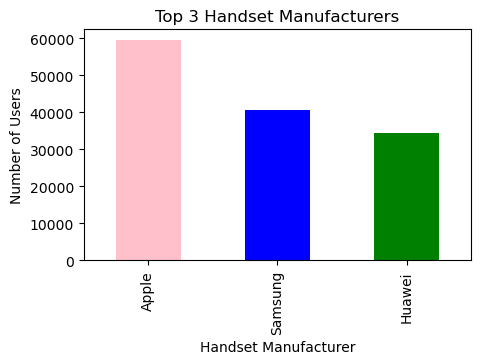

In [89]:
plt.figure(figsize=(5, 3))
colors=['pink','blue','green']
Top_3_handset_Manufacturers.plot(kind='bar', color=colors)
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Handset Manufacturer')
plt.ylabel('Number of Users')
plt.show()

Conclusion & Interpretation:

Apple (60,000): The bar for Apple is the tallest, indicating that it has the highest count among the top three manufacturers in the dataset. This aligns with the earlier observation that Apple had the highest representation among the manufacturers.

Samsung (40,000): The bar for Samsung is shorter than Apple but still substantial, suggesting a significant presence of Samsung devices in the dataset. Samsung is the second most common manufacturer, consistent with the earlier analysis.

Huawei (35,000): The bar for Huawei is shorter than both Apple and Samsung but still notable. Huawei is the third most common manufacturer in the dataset, as observed in the earlier analysis.

Apple is the dominant manufacturer in the dataset, followed by Samsung and then Huawei.

The visual representation provides a clear comparison of the relative counts of mobile devices for the top three manufacturers.

#### Top 10 Handset Type

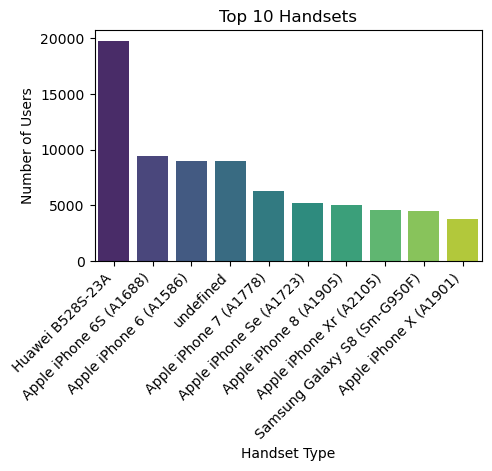

In [103]:
Top_10_handsets = telecom_data.groupby('Handset Type')['MSISDN/Number'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(5, 3))
sns.barplot(x=Top_10_handsets.index, y=Top_10_handsets.values, palette="viridis")
plt.title('Top 10 Handsets')
plt.xlabel('Handset Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45,ha="right")
plt.show()

Conclusion:

The bar plot provides a clear visualization of the relative popularity of different handset types.
Huawei B528S-23A, an Huawei model, has the highest representation in the dataset.
Apple iPhones dominate the top 10 list, with a mix of models from iPhone 6 to iPhone Xr.
The presence of the "undefined" category emphasizes the importance of handling or investigating such cases in the dataset.

#### Distribution of Number of xDR Sessions

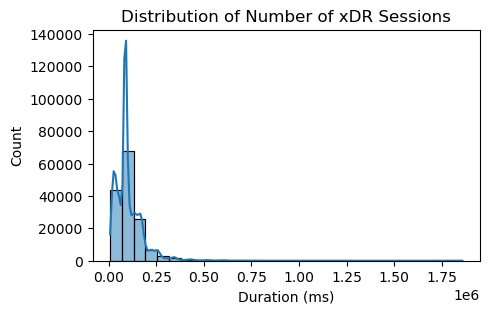

In [41]:
plt.figure(figsize=(5, 3))
sns.histplot(telecom_data['Dur. (ms)'], bins=30, kde=True)
plt.title('Distribution of Number of xDR Sessions')
plt.xlabel('Duration (ms)')
plt.show()

Conclusion
A significant number of xDR sessions have durations exceeding 100,000. This indicates prolonged user engagement or network activity.
There is a lower frequency of xDR sessions with durations less than 100. These shorter sessions may represent brief interactions or activities that require minimal network connectivity.
The observed distribution may reflect distinct patterns in service usage or user behaviors. Applications or services contributing to the high-duration sessions may be of particular interest for further analysis and optimization.
Understanding the distribution of session durations is crucial for effective network resource allocation. It provides insights into the demand for network resources during different types of sessions, helping in optimizing network performance and resource allocation.
The findings suggest potential opportunities for service and network optimization. Identifying the factors contributing to both high and low-duration sessions can guide improvements in service delivery and resource management.

#### Distribution of Session Duration

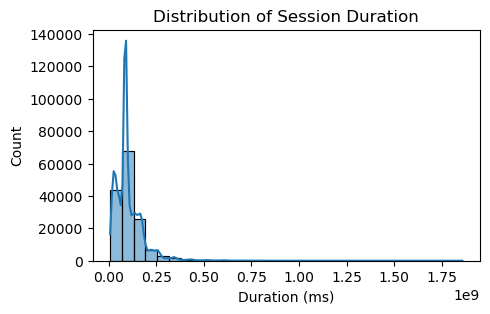

In [42]:
plt.figure(figsize=(5, 3))
sns.histplot(telecom_data['Dur. (ms).1'], bins=30, kde=True)
plt.title('Distribution of Session Duration')
plt.xlabel('Duration (ms)')
plt.show()

Conclusion & Interpretation:

The high frequency in the 0 to 0.25 ms range suggests a prevalence of very short sessions. These could represent quick, lightweight interactions or background processes.
The notable frequencies between 40,000 and 100,000 ms indicate a substantial number of sessions with moderate durations. This range may represent typical user activities or applications requiring moderate connectivity.
Sessions with durations below 10,000 ms have a lower frequency, indicating that very short sessions are less common. These may represent brief interactions that don't require extensive network connectivity.
The diverse distribution reflects a spectrum of user behaviors, from quick interactions to more extended sessions. Understanding the nature of activities associated with different duration ranges is crucial for optimizing network resources. It allows for targeted improvements in service delivery, ensuring efficient resource allocation to accommodate various user behaviors.

#### Distribution of Total DL and UL

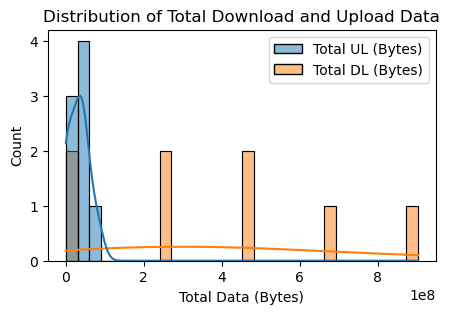

In [43]:
plt.figure(figsize=(5, 3))
sns.histplot(data=total_data_summary, bins=30, kde=True)
plt.title('Distribution of Total DL and UL')
plt.xlabel('Total Data (Bytes)')
plt.show()

#### Hist plot for Univariate Distributions of Network Usage Metrics

In [106]:
user_data.columns

Index(['MSISDN/Number', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)'],
      dtype='object')

In [10]:
user_data1= user_data.copy()
user_data1.drop('MSISDN/Number', axis=1, inplace=True)

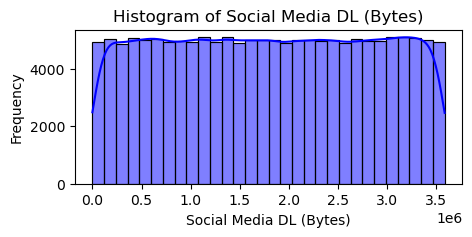

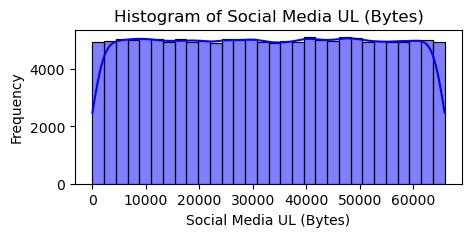

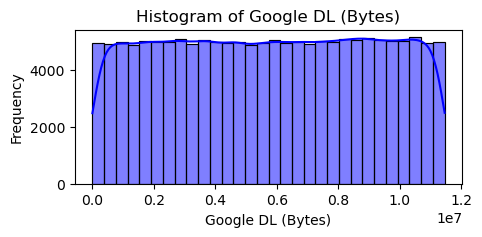

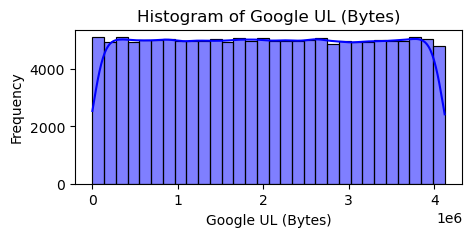

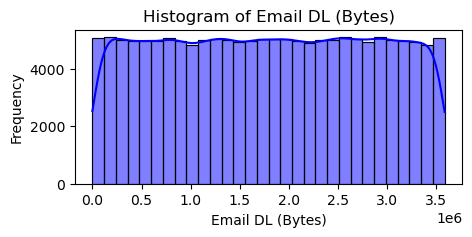

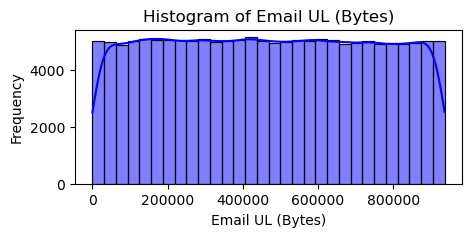

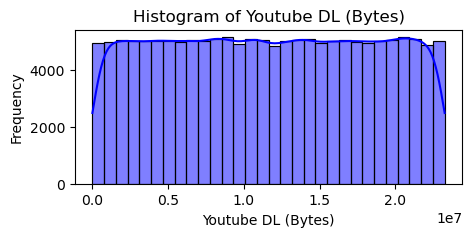

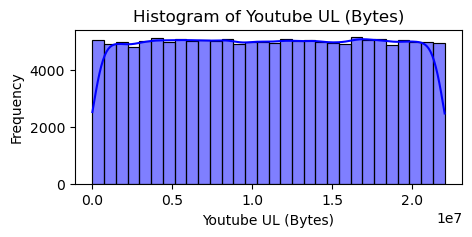

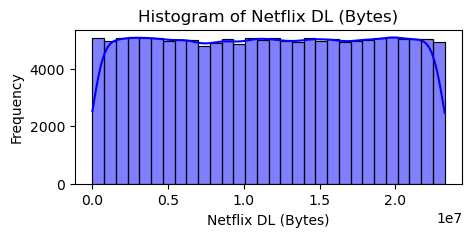

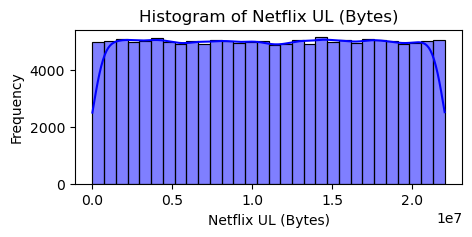

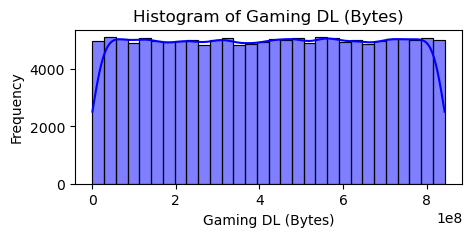

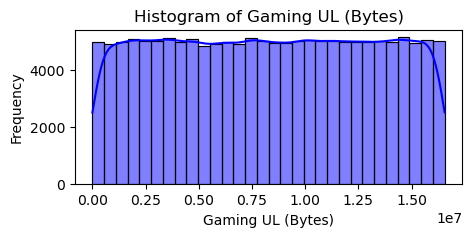

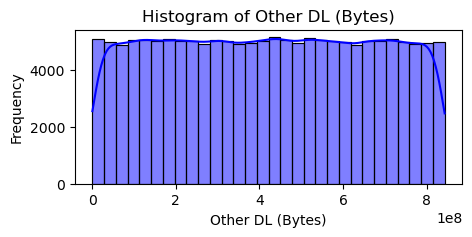

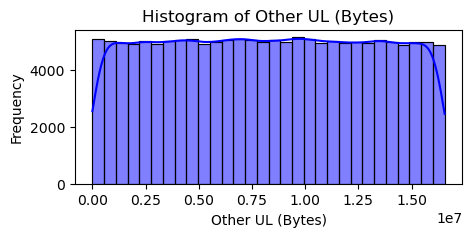

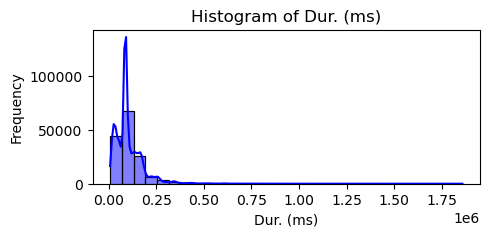

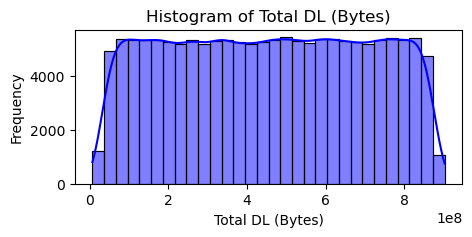

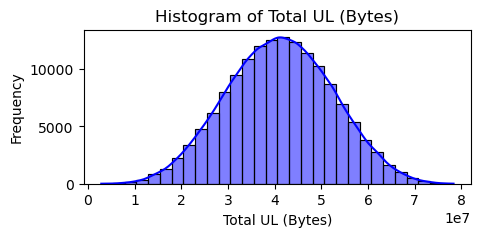

In [14]:
columns_to_plot = user_data1.columns

for column in columns_to_plot:
    plt.figure(figsize=(5, 2))
    
    if user_data1[column].dtype in ['int64', 'float64']:
        sns.histplot(user_data1[column], kde=True, bins=30, color='blue')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        sns.countplot(x=column, data=user_data1, palette='viridis')
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

    plt.show()

#### Bivariate Analysis

##### Histogram for Average Bearer Throughput Links for DL & UL

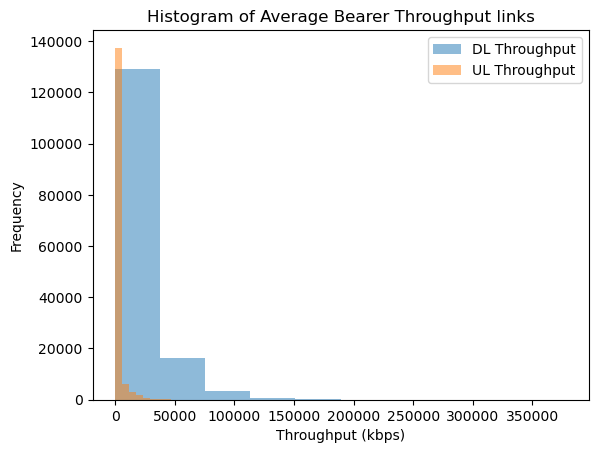

In [129]:
plt.hist(telecom_data['Avg Bearer TP DL (kbps)'], bins=10, alpha=0.5, label='DL Throughput')
plt.hist(telecom_data['Avg Bearer TP UL (kbps)'], bins=10, alpha=0.5, label='UL Throughput')
plt.title('Histogram of Average Bearer Throughput links')
plt.xlabel('Throughput (kbps)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### Conclusion : The provided histogram plot likely illustrates these frequency distributions for DL and UL Throughput, emphasizing the prevalence of values within the specified throughput ranges. As mentioned earlier, additional statistical analysis could complement these findings for a more comprehensive understanding of the data distribution

##### The Downlink (DL) Throughput, the frequency is highest for values before 50,000 kbps, with a frequency of 1.2L (presumably meaning 1.2 million occurrences). Similarly, for Uplink (UL) Throughput, the frequency is highest for values below 50,000 kbps, ranging between 1.2 to 1.4L (presumably meaning between 1.2 and 1.4 million occurrences).
 

#### Bivariate Analysis

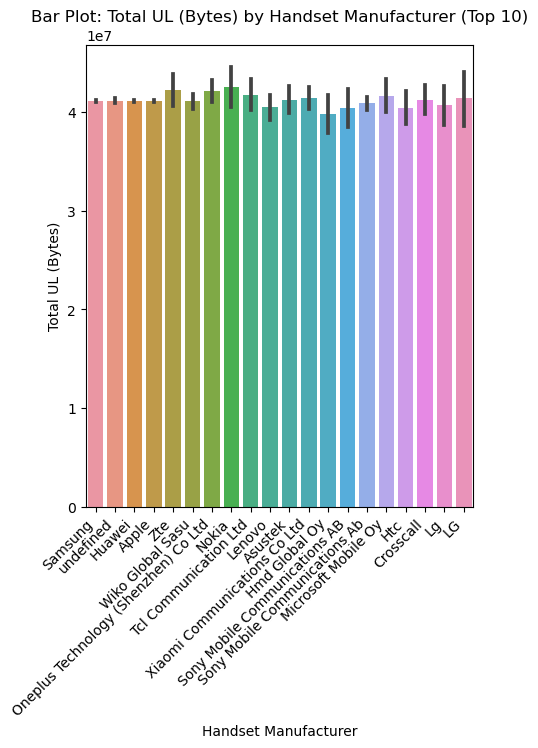

In [163]:
plt.figure(figsize=(5, 6))
top_10_manufacturers = telecom_data['Handset Manufacturer'].value_counts().head(20).index
sns.barplot(x='Handset Manufacturer', y='Total UL (Bytes)', data=telecom_data[telecom_data['Handset Manufacturer'].isin(top_10_manufacturers)])
plt.title('Bar Plot: Total UL (Bytes) by Handset Manufacturer (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.show()

Conclusion & Interpretation:

Apple and Samsung stand out as the top contributors to total uploaded bytes, with values in the trillions.
Other manufacturers, such as Huawei and Sony, also contribute significantly, but their values are comparatively lower.
Some manufacturers, like Asustek and Crosscall, have considerably lower total uploaded bytes.

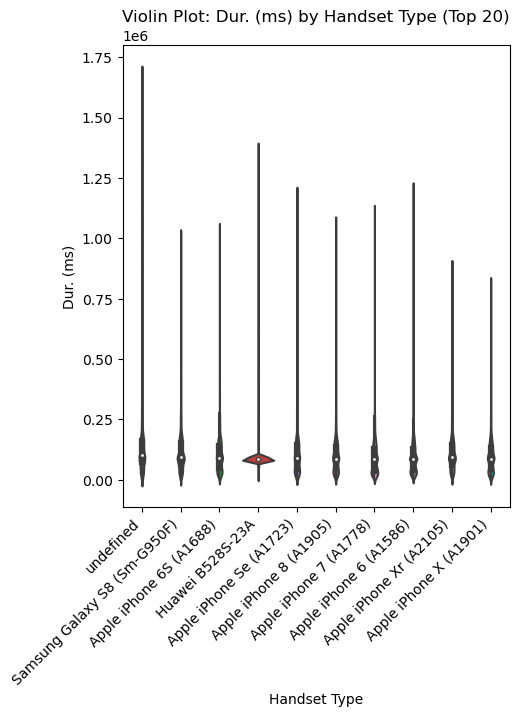

In [164]:
plt.figure(figsize=(5, 6))
top_20_handset_types = telecom_data['Handset Type'].value_counts().head(10).index
sns.violinplot(x='Handset Type', y='Dur. (ms)', data=telecom_data[telecom_data['Handset Type'].isin(top_20_handset_types)])
plt.title('Violin Plot: Dur. (ms) by Handset Type (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.show()

Conclusion & Interpretation:

The width of the violin plots reflects the variability in session durations for each handset type. Wider sections indicate a broader range of session durations.

Among the top 10 handset types, "Huawei B528S-23A" has the widest distribution, suggesting a diverse range of session durations for this particular device.

The violin plot for "Apple iPhone 6S (A1688)" shows a concentrated distribution, indicating a relatively consistent session duration pattern for this iPhone model.

The presence of "undefined" in the top handset types suggests that some records lack specific handset information.

Users with "Samsung Galaxy S8 (Sm-G950F)" and "Apple iPhone X (A1901)" appear to have diverse session duration patterns, with wider violin plots.

Conversely, "Apple iPhone 7 (A1778)" and "Apple iPhone 8 (A1905)" exhibit narrower plots, indicating more consistent session durations.

The violin plot provides insights into user behavior across different handset types. Variability in session durations may be influenced by factors such as usage patterns, device capabilities, or network conditions.

#### Bivariate Plot for Data Consumption Applications

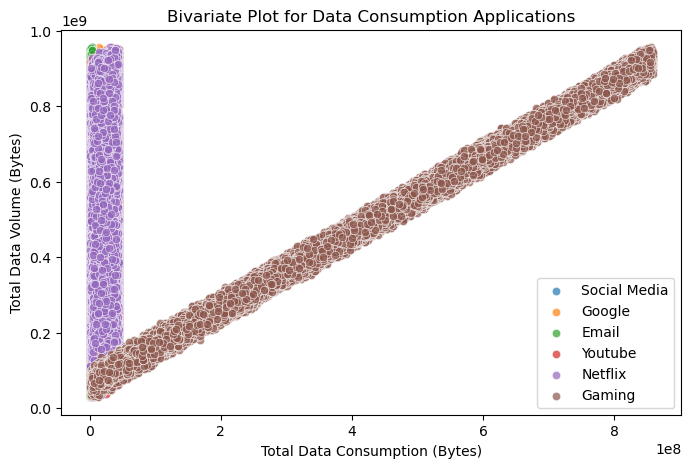

In [45]:
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming']
plt.figure(figsize=(8, 5))
for app in applications:
    dl_col = app + ' DL (Bytes)'
    ul_col = app + ' UL (Bytes)'
    sns.scatterplot(x=telecom_data[dl_col] + telecom_data[ul_col],
                    y=telecom_data['Total DL (Bytes)'] + telecom_data['Total UL (Bytes)'],
                    label=app, alpha=0.7)

plt.title('Bivariate Plot for Data Consumption Applications')
plt.xlabel('Total Data Consumption (Bytes)')
plt.ylabel('Total Data Volume (Bytes)')
plt.legend()
plt.show()

#### Variable transformations – Top five decile classes based on the total duration for all sessions and computed the total data (DL+UL) per decile class. 

In [150]:
duration_column = 'Dur. (ms)'
data_columns = ['Total DL (Bytes)', 'Total UL (Bytes)']

user_data['Total Data (DL+UL)'] = user_data['Total DL (Bytes)'] + user_data['Total UL (Bytes)']

user_data['Duration Decile'] = pd.qcut(user_data[duration_column], q=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=False, precision=0)

decile_data = user_data.groupby('Duration Decile')[data_columns + ['Total Data (DL+UL)']].sum().reset_index()

print(decile_data)

   Duration Decile  Total DL (Bytes)  Total UL (Bytes)  Total Data (DL+UL)
0                0      1.364976e+13      1.234287e+12        1.488404e+13
1                1      2.165754e+13      1.962431e+12        2.361997e+13
2                2      5.582355e+12      5.067274e+11        6.089083e+12
3                3      1.362117e+13      1.232582e+12        1.485375e+13
4                4      1.368615e+13      1.232194e+12        1.491834e+13


Conclusion & Interpretation :

Conclusion
The top 5 decile classes represent sessions with the longest durations, indicating a focus on the top 50% of sessions with the highest total session durations.

Classes 0, 1, 3, and 4 exhibit similar total download and upload volumes, suggesting comparable data consumption patterns across these classes.

Class 2 stands out with notably lower total download and upload volumes compared to the other top decile classes.

The similarity in data volumes among classes 0, 1, 3, and 4 may indicate that a significant portion of users in the top deciles engages in relatively consistent data usage patterns.

Understanding the characteristics of users in these top decile classes can guide optimization efforts, such as enhancing network performance, improving service quality, or tailoring data plans to accommodate the usage preferences of these high-duration sessions.

Insights from the top 5 decile classes can inform strategic decisions related to network infrastructure, service offerings, and user experience enhancements.

Utilizing decile classes allows for effective segmentation, enabling telecom providers to customize services and interventions based on the distinct characteristics of high-duration session groups.

Considering the variations in data usage patterns, targeted marketing strategies, service promotions, or network optimizations may be tailored to address the specific needs of users within each decile class.

##### Bar Plot for Total DL & UL per duration decile

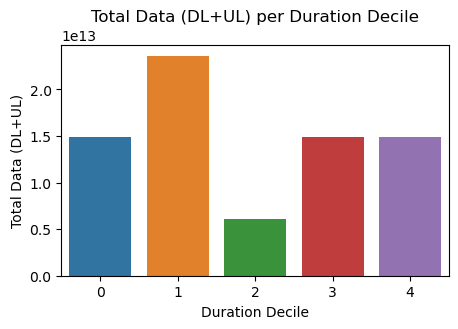

In [152]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Duration Decile', y='Total Data (DL+UL)', data=decile_data)
plt.title('Total Data (DL+UL) per Duration Decile')
plt.xlabel('Duration Decile')
plt.ylabel('Total Data (DL+UL)')
plt.show()

#### Correlation Analysis

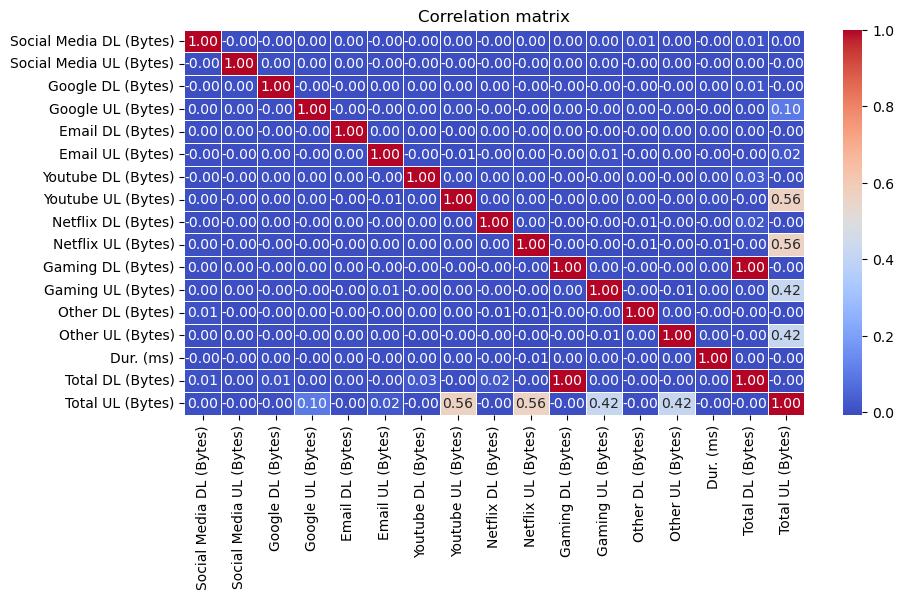

In [179]:
import seaborn as sns
correlation_matrix = user_data1.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation matrix')
plt.show()

Conclusion & Interpretation :

Positive Correlations:
The download and upload volumes for specific applications tend to show positive correlations. For example, Social Media DL (Bytes) has a positive correlation with Social Media UL (Bytes), and the same applies to other application pairs (Google, Email, Youtube, Netflix, Gaming, Other).

This positive correlation suggests that as the download volume for a particular application increases, the upload volume for the same application also tends to increase.

Strong Correlations:
Some pairs exhibit relatively strong positive correlations, indicating a consistent relationship between the download and upload volumes for those applications.

For example, Gaming DL (Bytes) and Gaming UL (Bytes) show a strong positive correlation, suggesting a consistent usage pattern for gaming-related data.

Diversity in Correlations:
While some pairs have strong positive correlations, others may have weaker correlations or even negative correlations.

The correlation patterns reflect the diversity in user behavior across different applications and highlight the variations in download and upload patterns.

Potential Redundancy:
In cases where two variables have a very high positive correlation (close to 1), there may be redundancy in the information they provide. Analyzing such relationships can guide feature selection in modeling processes.

Application-Specific Insights:
The correlation matrix provides insights into the relationships between specific applications, allowing for a more nuanced understanding of user behavior.

For instance, if Social Media DL (Bytes) and Social Media UL (Bytes) have a strong positive correlation, it suggests users engage in both downloading and uploading social media content.

In summary, the correlation matrix helps uncover patterns and relationships between different data usage metrics for various applications. Understanding these correlations is essential for gaining insights into user behavior and optimizing network resources based on application-specific demands.

#### Dimensionality Reduction using PCA (Principal Component Analysis)

In [188]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

columns_for_pca= user_data1.columns
data_for_pca=user_data1[columns_for_pca]

scaler=StandardScaler()
scaled_data=scaler.fit_transform(data_for_pca)

pca= PCA()
principal_component=pca.fit_transform(scaled_data)

print(pd.DataFrame(principal_component, columns=[f'PC{i+1}' for i in range(principal_component.shape[1])]))

                 PC1           PC2           PC3           PC4           PC5  \
0      -4.223857e-01  9.030108e-01 -1.455714e+00  2.384206e+00  8.521801e+00   
1       2.433999e-01 -1.943686e+00 -2.205924e+00  2.621289e-01  4.309184e+00   
2      -7.568383e-02  1.957550e+00 -9.563813e-01  1.098714e+00  5.084990e+00   
3       1.871060e+00 -1.302453e+00 -2.291381e+00  4.185126e-01  7.122334e+00   
4       7.490601e-01 -1.931048e-02 -2.288962e+00  1.198143e+00  4.566039e+00   
...              ...           ...           ...           ...           ...   
149996 -3.979635e-01 -2.150490e+00  1.432654e+00 -2.606098e-02 -8.062149e-01   
149997  1.184767e+00 -3.862061e-01 -5.019572e-01 -1.386008e+00 -1.998850e+00   
149998  1.089165e+00  3.036273e-01  6.778266e-01 -1.515631e-01  9.742649e-01   
149999  2.782839e-01  1.497869e+00 -9.678217e-01 -6.068451e-01 -4.478890e-01   
150000  7.731948e-17  8.361002e-17 -1.287337e-16 -1.116301e-16  1.142806e-17   

                 PC6           PC7     

* PCA to simplify a large set of data with many columns into a smaller set of numbers
* Each principal component represents a different aspect or pattern present in the data
* Each row shows a simplified view of original information 
* This new representation can be easier to work with and might reveal interesting insights or relationships in the data

#### Engagement Metrics

In [196]:
engagement_metrics= telecom_data.groupby('MSISDN/Number').agg({
    'Dur. (ms)': ['count', 'sum'],  
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

engagement_metrics.columns = ['MSISDN/Number', 'Session Frequency', 'Total Duration', 'Total DL','Total UL']
engagement_metrics


,MSISDN/Number,Session Frequency,Total Duration,Total DL,Total UL
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0
...,...,...,...,...,...
106851,3.379000e+10,1,8810.0,6.879252e+08,26716429.0
106852,3.379000e+10,1,140988.0,4.445751e+08,35732243.0
106853,3.197021e+12,1,877385.0,1.948281e+08,37295915.0
106854,3.370000e+14,1,253030.0,5.396350e+08,56652839.0


#### TOP 10 customers based Engaement Metrics

##### TOP 10 customers based on Total Duration

In [201]:
sorted_engagement_metrics_Duration = engagement_metrics.sort_values(by='Total Duration', ascending = False)
top_10_customers = sorted_engagement_metrics_Duration.head(10)
top_10_customers

,MSISDN/Number,Session Frequency,Total Duration,Total DL,Total UL
13180,3.362578e+10,17,18553754.0,7.770043e+09,729577380.0
6437,3.361489e+10,17,9966898.0,8.156743e+09,689483001.0
92923,3.376054e+10,15,9279434.0,7.811295e+09,703478581.0
13526,3.362632e+10,18,8791927.0,7.301517e+09,669650721.0
65118,3.366716e+10,13,8744914.0,5.052068e+09,566326364.0
50281,3.366284e+10,9,6614270.0,3.593674e+09,406424372.0
57160,3.366469e+10,9,6288730.0,5.279827e+09,402180804.0
666,3.360313e+10,12,6287761.0,4.540607e+09,435587631.0
66029,3.366746e+10,6,5649882.0,2.334299e+09,266222647.0
92577,3.376041e+10,12,5321667.0,6.610852e+09,521518890.0


Conclustion & Interpretation

The user with MSISDN/Number 13180 has the highest total duration, indicating prolonged engagement with the telecom services.

Similar to the session frequency analysis, there is diversity in total duration among the top 10 users. This suggests that engagement is not solely dependent on frequency but also on the duration of each session.

Telecom providers may need to allocate resources strategically to accommodate users with longer durations, ensuring a sustained and satisfactory user experience.

High total duration may indicate users engaged in content consumption, such as streaming or extended online activities. Understanding these patterns can guide content optimization or targeted service improvements.

While high duration is positive, it's crucial to balance network load. Some users with moderate durations might also require attention to prevent network congestion.

##### Top 10 customers based on Total DL

In [203]:
sorted_engagement_metrics_DL = engagement_metrics.sort_values(by='Total DL', ascending = False)
top_10_customers_DL = sorted_engagement_metrics_DL.head(10)
top_10_customers_DL

,MSISDN/Number,Session Frequency,Total Duration,Total DL,Total UL
6437,3.361489e+10,17,9966898.0,8.156743e+09,689483001.0
92923,3.376054e+10,15,9279434.0,7.811295e+09,703478581.0
13180,3.362578e+10,17,18553754.0,7.770043e+09,729577380.0
76363,3.367588e+10,15,4865947.0,7.309542e+09,581568792.0
13526,3.362632e+10,18,8791927.0,7.301517e+09,669650721.0
37052,3.365973e+10,16,4035428.0,7.081602e+09,624260321.0
63028,3.366646e+10,11,4536757.0,6.903440e+09,405060976.0
92577,3.376041e+10,12,5321667.0,6.610852e+09,521518890.0
57241,3.366471e+10,11,2927785.0,6.400774e+09,471244453.0
86455,3.369879e+10,11,5169128.0,6.010556e+09,530343105.0


##### Top 10 customers based on Total UL

In [204]:
sorted_engagement_metrics_UL = engagement_metrics.sort_values(by='Total UL', ascending = False)
top_10_customers_UL = sorted_engagement_metrics_UL.head(10)
top_10_customers_UL

,MSISDN/Number,Session Frequency,Total Duration,Total DL,Total UL
13180,3.362578e+10,17,18553754.0,7.770043e+09,729577380.0
92923,3.376054e+10,15,9279434.0,7.811295e+09,703478581.0
6437,3.361489e+10,17,9966898.0,8.156743e+09,689483001.0
13526,3.362632e+10,18,8791927.0,7.301517e+09,669650721.0
37052,3.365973e+10,16,4035428.0,7.081602e+09,624260321.0
76363,3.367588e+10,15,4865947.0,7.309542e+09,581568792.0
65118,3.366716e+10,13,8744914.0,5.052068e+09,566326364.0
86455,3.369879e+10,11,5169128.0,6.010556e+09,530343105.0
92577,3.376041e+10,12,5321667.0,6.610852e+09,521518890.0
94654,3.376127e+10,10,3481629.0,4.554647e+09,496467102.0


Conclustion & Interpretation : 

Interpretation
The user with MSISDN/Number 13180 has the highest total traffic, indicating significant data usage and engagement with telecom services.

Total traffic reflects a combination of download (DL) and upload (UL) data. The top 10 users show diverse patterns in data consumption, emphasizing the need for a holistic approach to understanding user engagement.

Telecom providers may need to optimize network resources to cater to users with high data traffic. Ensuring network capacity for seamless data transfer is essential.

Analyzing the type of content accessed by users with high total traffic can provide insights into user preferences. This information can guide content optimization and service enhancements.

While catering to high traffic users, it's crucial to balance network load to prevent congestion. Allocating resources efficiently ensures a satisfactory experience for all users.

Correlating total traffic with session frequency and total duration can unveil more about user behavior. For instance, a user with high traffic but low session frequency may have different usage patterns than a user with the opposite profile.

#### Customer Engagement Analysis with K-Means Clustering

In [207]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(engagement_metrics)

kmeans = KMeans(n_clusters=3, random_state=42)
engagement_clusters = kmeans.fit_predict(normalized_data)

engagement_metrics['Cluster'] = engagement_clusters

print(engagement_metrics)



c:\Users\pooji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        MSISDN/Number  Session Frequency  Total Duration      Total DL  \
0        3.360100e+10                  1        116720.0  8.426375e+08   
1        3.360100e+10                  1        181230.0  1.207552e+08   
2        3.360100e+10                  1        134969.0  5.566597e+08   
3        3.360101e+10                  1         49878.0  4.019932e+08   
4        3.360101e+10                  2         37104.0  1.363130e+09   
...               ...                ...             ...           ...   
106851   3.379000e+10                  1          8810.0  6.879252e+08   
106852   3.379000e+10                  1        140988.0  4.445751e+08   
106853   3.197021e+12                  1        877385.0  1.948281e+08   
106854   3.370000e+14                  1        253030.0  5.396350e+08   
106855   8.823971e+14                  1        869844.0  7.869760e+07   

          Total UL  Cluster  
0       36053108.0        0  
1       36104459.0        0  
2       39306820.0   

Interpretation for K-means Clustering:
Users have been assigned to one of the three clusters (0, 1, or 2) based on their normalized engagement metrics.

Cluster 0: Represents users with relatively lower engagement across all metrics (session frequency, total duration, total DL, and total UL).

Cluster 1: Represents a specific user with exceptionally high engagement across all metrics, indicating a highly active user.

Additional interpretation is needed for Cluster 2 based on the characteristics of users within this cluster.

The clustering provides a segmentation of users based on their engagement behavior. This segmentation can guide targeted strategies for each user group.

The optimal value of k (number of clusters) was determined as 3, based on the elbow method. This suggests that users can be reasonably grouped into three distinct levels of engagement.

##### Computing the minimum, maximum, average & total non-normalized metrics for each cluster.

In [209]:
cluster_metrics = engagement_metrics.groupby('Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Duration': ['min', 'max', 'mean', 'sum'],
    'Total DL': ['min', 'max', 'mean', 'sum'],
    'Total UL': ['min', 'max', 'mean', 'sum']
}).reset_index()

print(cluster_metrics)


  Cluster Session Frequency                      Total Duration              \
                        min max      mean    sum            min         max   
0       0                 1   2  1.083508  91875         7142.0   1361762.0   
1       1                 1  18  2.586419  57059        18235.0  18553754.0   
2       2                 1   1  1.000000      1       869844.0    869844.0   

                                   Total DL                              \
            mean           sum          min           max          mean   
0  106920.947319  9.066255e+09    8827082.0  1.384364e+09  4.674864e+08   
1  296981.687367  6.551713e+09  115111797.0  8.156743e+09  1.272357e+09   
2  869844.000000  8.698440e+05   78697597.0  7.869760e+07  7.869760e+07   

                   Total UL                                           
            sum         min          max          mean           sum  
0  3.964004e+13   2866892.0  122374231.0  4.384854e+07  3.718093e+12  
1  2.806947e+13

##### Top 10 user per application

In [220]:
import pandas as pd


application_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                        'Google DL (Bytes)', 'Google UL (Bytes)',
                        'Email DL (Bytes)', 'Email UL (Bytes)',
                        'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                        'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                        'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                        'Other DL (Bytes)', 'Other UL (Bytes)']

user_traffic_per_app = user_data[['MSISDN/Number'] + application_columns].copy()

user_traffic_per_app['Total Traffic'] = user_traffic_per_app[application_columns].sum(axis=1)

top_10_users_per_app = pd.DataFrame()

for column in application_columns:
    top_users = user_traffic_per_app.nlargest(10, column)[['MSISDN/Number', column]]
    top_users.columns = ['MSISDN/Number', 'Total Traffic']
    top_users['Application'] = column
    top_10_users_per_app = pd.concat([top_10_users_per_app, top_users])

print(top_10_users_per_app)

        MSISDN/Number  Total Traffic              Application
98318    3.368573e+10      3586064.0  Social Media DL (Bytes)
47946    3.366693e+10      3586043.0  Social Media DL (Bytes)
118468   3.366292e+10      3586034.0  Social Media DL (Bytes)
28997    3.366274e+10      3586007.0  Social Media DL (Bytes)
4678     3.378290e+10      3586000.0  Social Media DL (Bytes)
...               ...            ...                      ...
146060   3.376041e+10     16558022.0         Other UL (Bytes)
82730    3.365092e+10     16557992.0         Other UL (Bytes)
51710    3.368840e+10     16557817.0         Other UL (Bytes)
80425    3.366296e+10     16557670.0         Other UL (Bytes)
48093    3.366239e+10     16557664.0         Other UL (Bytes)

[140 rows x 3 columns]


In [283]:
app_traffic = user_data.groupby('MSISDN/Number').sum().reset_index()

In [223]:
application_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)',
                       'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)',
                       'Gaming DL (Bytes)', 'Other DL (Bytes)',
                       'Social Media UL (Bytes)', 'Google UL (Bytes)',
                       'Email UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)',
                       'Gaming UL (Bytes)', 'Other UL (Bytes)']

app_traffic = telecom_data[['MSISDN/Number'] + application_columns]

user_traffic_per_app = app_traffic.groupby('MSISDN/Number')[application_columns].sum().reset_index()

print(user_traffic_per_app)

        MSISDN/Number  Social Media DL (Bytes)  Google DL (Bytes)  \
0        3.360100e+10                2206504.0          3337123.0   
1        3.360100e+10                2598548.0          4197697.0   
2        3.360100e+10                3148004.0          3343483.0   
3        3.360101e+10                 251469.0          5937765.0   
4        3.360101e+10                2861230.0         13728668.0   
...               ...                      ...                ...   
106851   3.379000e+10                 234320.0          6834178.0   
106852   3.379000e+10                 442214.0          1472406.0   
106853   3.197021e+12                 668596.0          8572779.0   
106854   3.370000e+14                 496337.0          8215537.0   
106855   8.823971e+14                1500145.0          5985089.0   

        Email DL (Bytes)  Youtube DL (Bytes)  Netflix DL (Bytes)  \
0               837400.0          14900201.0          10265105.0   
1              2828821.0           

#### Aggregating user total traffic per application

In [50]:
app_traffic = user_data.groupby('MSISDN/Number').sum().reset_index()
app_traffic

,MSISDN/Number,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Dur. (ms),Total DL (Bytes),Total UL (Bytes)
0,3.360100e+10,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,116720.0,8.426375e+08,36053108.0
1,3.360100e+10,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,181230.0,1.207552e+08,36104459.0
2,3.360100e+10,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,134969.0,5.566597e+08,39306820.0
3,3.360101e+10,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,49878.0,4.019932e+08,20327526.0
4,3.360101e+10,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,37104.0,1.363130e+09,94280527.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,234320.0,65863.0,6834178.0,697091.0,480946.0,525969.0,8294310.0,18353533.0,14754741.0,147797.0,6.573267e+08,3034642.0,291391283.0,3891534.0,8810.0,6.879252e+08,26716429.0
106852,3.379000e+10,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,4.276202e+08,9383076.0,204636073.0,6479040.0,140988.0,4.445751e+08,35732243.0
106853,3.197021e+12,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,1.645636e+08,13485133.0,467678100.0,2848373.0,877385.0,1.948281e+08,37295915.0
106854,3.370000e+14,496337.0,25229.0,8215537.0,1615080.0,2989663.0,328919.0,16690728.0,20044212.0,9983678.0,20921364.0,5.012590e+08,8883653.0,144354057.0,4834382.0,253030.0,5.396350e+08,56652839.0


##### Aggregating - Social Media DL & UL (Bytes)

In [52]:
app_traffic['Social Media Total Bytes'] = app_traffic['Social Media DL (Bytes)'] + app_traffic['Social Media UL (Bytes)']
relevant_columns = ['MSISDN/Number', 'Social Media Total Bytes']
top_10_social_media_users = app_traffic[relevant_columns].nlargest(10, 'Social Media Total Bytes')
print(top_10_social_media_users)

        MSISDN/Number  Social Media Total Bytes
13526    3.362632e+10                43374779.0
92923    3.376054e+10                39783189.0
37052    3.365973e+10                35412358.0
6437     3.361489e+10                28294544.0
13180    3.362578e+10                27135500.0
65118    3.366716e+10                24247850.0
106137   3.378632e+10                23974919.0
70960    3.366907e+10                23800834.0
666      3.360313e+10                23077825.0
31331    3.365849e+10                23000066.0


##### Aggregating - Google DL & UL (Bytes)

In [53]:
app_traffic['Google Total Bytes'] = app_traffic['Google DL (Bytes)'] + app_traffic['Google UL (Bytes)']
relevant_columns = ['MSISDN/Number', 'Google Total Bytes']
top_10_Google_users = app_traffic[relevant_columns].nlargest(10, 'Google Total Bytes')
print(top_10_Google_users)

        MSISDN/Number  Google Total Bytes
13526    3.362632e+10         152191852.0
13180    3.362578e+10         142307915.0
6437     3.361489e+10         127973787.0
92923    3.376054e+10         123223099.0
37052    3.365973e+10         116516345.0
106137   3.378632e+10         110254484.0
76363    3.367588e+10         109860502.0
65118    3.366716e+10         105032696.0
94654    3.376127e+10          97089988.0
86313    3.369876e+10          91935151.0


##### Aggregating - Email DL & UL (Bytes)

In [54]:
app_traffic['Email Total Bytes'] = app_traffic['Email DL (Bytes)'] + app_traffic['Email UL (Bytes)']
relevant_columns = ['MSISDN/Number', 'Email Total Bytes']
top_10_Email_users = app_traffic[relevant_columns].nlargest(10, 'Email Total Bytes')
print(top_10_Email_users)

        MSISDN/Number  Email Total Bytes
13526    3.362632e+10         42418782.0
6437     3.361489e+10         40788634.0
13180    3.362578e+10         40633966.0
106137   3.378632e+10         36310123.0
37052    3.365973e+10         35999792.0
92923    3.376054e+10         33693767.0
76363    3.367588e+10         31514421.0
60087    3.366546e+10         30417885.0
65118    3.366716e+10         30335796.0
86455    3.369879e+10         29059042.0


##### Aggregating - Youtube DL & UL (Bytes)

In [55]:
app_traffic['Youtube Total Bytes'] = app_traffic['Youtube DL (Bytes)'] + app_traffic['Youtube UL (Bytes)']
relevant_columns = ['MSISDN/Number', 'Youtube Total Bytes']
top_10_Youtube_users = app_traffic[relevant_columns].nlargest(10, 'Youtube Total Bytes')
print(top_10_Youtube_users)

       MSISDN/Number  Youtube Total Bytes
13180   3.362578e+10          452958769.0
92923   3.376054e+10          396289198.0
6437    3.361489e+10          394370218.0
13526   3.362632e+10          374483047.0
76363   3.367588e+10          317410572.0
65118   3.366716e+10          315231310.0
13994   3.362708e+10          308790774.0
92577   3.376041e+10          303169107.0
86455   3.369879e+10          302661958.0
666     3.360313e+10          284090139.0


##### Aggregating - Netflix DL & UL (Bytes)

In [56]:
app_traffic['Netflix Total Bytes'] = app_traffic['Netflix DL (Bytes)'] + app_traffic['Netflix UL (Bytes)']
relevant_columns = ['MSISDN/Number', 'Netflix Total Bytes']
top_10_Netflix_users = app_traffic[relevant_columns].nlargest(10, 'Netflix Total Bytes')
print(top_10_Netflix_users)

        MSISDN/Number  Netflix Total Bytes
37052    3.365973e+10          399519079.0
6437     3.361489e+10          361401046.0
13180    3.362578e+10          356980607.0
92923    3.376054e+10          334643269.0
13526    3.362632e+10          328725740.0
92577    3.376041e+10          318347546.0
65118    3.366716e+10          313939488.0
76363    3.367588e+10          309093159.0
106137   3.378632e+10          305939790.0
94654    3.376127e+10          292091341.0


##### Aggregating - Gaming DL & UL (Bytes)

In [57]:
app_traffic['Gaming Total Bytes'] = app_traffic['Gaming DL (Bytes)'] + app_traffic['Gaming UL (Bytes)']
relevant_columns = ['MSISDN/Number', 'Gaming Total Bytes']
top_10_Gaming_users = app_traffic[relevant_columns].nlargest(10, 'Gaming Total Bytes')
print(top_10_Gaming_users)

       MSISDN/Number  Gaming Total Bytes
6437    3.361489e+10        7.749432e+09
92923   3.376054e+10        7.461045e+09
13180   3.362578e+10        7.326673e+09
76363   3.367588e+10        6.970568e+09
13526   3.362632e+10        6.887572e+09
37052   3.365973e+10        6.725559e+09
63028   3.366646e+10        6.646303e+09
92577   3.376041e+10        6.268620e+09
57241   3.366471e+10        6.103856e+09
86455   3.369879e+10        5.753743e+09


##### Aggregating - Other DL & UL (Bytes)

In [58]:
app_traffic['Other Total Bytes'] = app_traffic['Other DL (Bytes)'] + app_traffic['Other UL (Bytes)']
relevant_columns = ['MSISDN/Number', 'Other Total Bytes']
top_10_Other_users = app_traffic[relevant_columns].nlargest(10, 'Other Total Bytes')
print(top_10_Other_users)

       MSISDN/Number  Other Total Bytes
13526   3.362632e+10       8.167878e+09
6437    3.361489e+10       7.639264e+09
76363   3.367588e+10       6.798515e+09
13180   3.362578e+10       6.354583e+09
666     3.360313e+10       6.326671e+09
37052   3.365973e+10       6.317415e+09
13936   3.362695e+10       5.305448e+09
13994   3.362708e+10       5.117791e+09
94654   3.376127e+10       5.077779e+09
30715   3.365836e+10       5.013651e+09


##### Aggregating for all the applications

In [59]:
total_apps_traffic = app_traffic[['Social Media Total Bytes', 'Google Total Bytes', 'Email Total Bytes','Youtube Total Bytes','Other Total Bytes','Gaming Total Bytes', 'Netflix Total Bytes']].sum()
total_apps_traffic

Social Media Total Bytes    2.722655e+11
Google Total Bytes          1.162853e+12
Email Total Bytes           3.364677e+11
Youtube Total Bytes         3.372204e+12
Other Total Bytes           6.395425e+13
Gaming Total Bytes          6.408892e+13
Netflix Total Bytes         3.370060e+12
dtype: float64

### Top 3 most used applications 

In [60]:
top_3_apps_traffic = app_traffic[['Social Media Total Bytes', 'Google Total Bytes', 'Email Total Bytes','Youtube Total Bytes','Other Total Bytes','Gaming Total Bytes', 'Netflix Total Bytes']].sum().nlargest(3)
top_3_apps_traffic

Gaming Total Bytes     6.408892e+13
Other Total Bytes      6.395425e+13
Youtube Total Bytes    3.372204e+12
dtype: float64

Conclustion & Interpretation

Gaming Application:
The gaming application has the highest total bytes, indicating that it is the most data-intensive app among the top three. Users are consuming a significant amount of data on gaming activities.

Other Applications:
The "Other" category ranks closely in terms of total bytes, suggesting a diverse set of applications within this group. Further analysis is needed to understand the specific apps contributing to this category.

Youtube Application:
The Youtube application has a substantial but comparatively lower total bytes. While it may not be the most data-intensive, it remains a significant contributor to overall data usage.

Implications for Telecom Providers:
Telecom providers should consider optimizing network resources to ensure a smooth experience for users engaged in gaming, as it requires high data bandwidth.
Understanding the composition of the "Other" category is crucial. Providers can tailor their services or marketing strategies based on the popularity of specific apps within this diverse group.
Youtube remains a prominent application, and providers may explore partnerships or promotions to enhance user engagement on this platform.
User Preferences:
Analyzing the data consumption patterns of these top applications provides insights into user preferences. Telecom providers can leverage this information for targeted service improvements and content optimization.
Continuous Monitoring:
Regularly monitoring app usage patterns is essential to adapt to changing user behaviors. This ensures that network resources are efficiently allocated to meet user demands for specific applications.

#### Bar chart for Top 3 most used applications

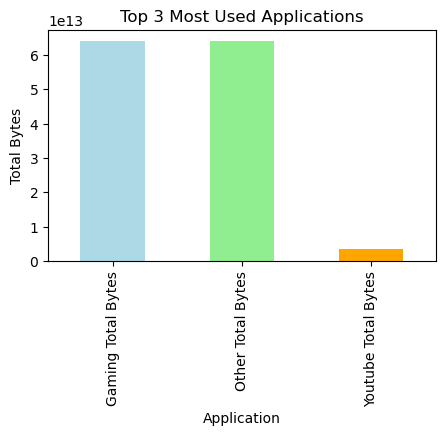

In [62]:
plt.figure(figsize=(5, 3))
top_3_apps_traffic.plot(kind='bar', color=['lightblue', 'lightgreen', 'orange'])
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Bytes')
plt.show()

Conclusion & Interpretation: 

The tallest bar represents the gaming application, indicating it has the highest total bytes among the top 3. Users heavily engage with gaming activities, contributing significantly to data consumption.

The second tallest bar represents the "Other" category, reflecting a diverse set of applications. While not as data-intensive as gaming, it is a substantial contributor to overall usage.

The shortest bar represents the Youtube application, indicating lower total bytes compared to gaming and the "Other" category. While it may not be the most data-intensive, it remains a prominent application in terms of data consumption.

Gaming stands out as the most resource-intensive application, potentially influencing network resource allocation strategies for telecom providers.

The "Other" category's significance emphasizes the need for a nuanced understanding of various applications within this group.

Telecom providers can tailor their strategies based on the popularity of specific applications. They may offer gaming-centric data plans or promotions to capitalize on the high demand for gaming data.

#### k engagement clusters based on the engagement metrics: 

In [75]:
engagement_metrics= telecom_data.groupby('MSISDN/Number').agg({
    'Dur. (ms)': ['count', 'sum'],  
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

engagement_metrics.columns = ['MSISDN/Number', 'Session Frequency', 'Total Duration', 'Total DL','Total UL']
engagement_metrics


,MSISDN/Number,Session Frequency,Total Duration,Total DL,Total UL
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0
...,...,...,...,...,...
106851,3.379000e+10,1,8810.0,6.879252e+08,26716429.0
106852,3.379000e+10,1,140988.0,4.445751e+08,35732243.0
106853,3.197021e+12,1,877385.0,1.948281e+08,37295915.0
106854,3.370000e+14,1,253030.0,5.396350e+08,56652839.0


In [94]:
wcss = []

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(engagement_metrics)
wcss.append(kmeans.inertia_)
kmeans


c:\Users\pooji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

c:\Users\pooji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pooji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pooji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pooji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pooji\anaconda3\lib\site-packages\sklearn\clust

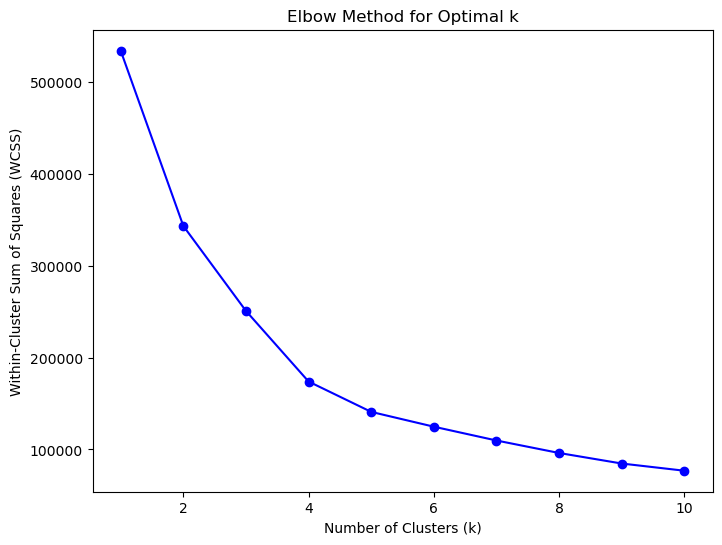

In [95]:
scaler = StandardScaler()
engagement_data_scaled = scaler.fit_transform(engagement_metrics)

wcss = []

for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(engagement_data_scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

#### Conclusion:
**User Engagement Insights:**
The analysis provides valuable insights into user engagement metrics, including session frequency, duration, and total traffic (download and upload).
Understanding these metrics allows for a targeted approach to improving user experience and tailoring services.

**Cluster Analysis:**
K-means clustering identifies four distinct user engagement clusters.
Cluster characteristics provide a nuanced view of user behavior, helping to personalize marketing strategies.

**Top Engaged Users by Application:**
By aggregating total traffic per application, the script identifies top-engaged users for specific applications.
Telecom providers can use this information to optimize services and enhance user satisfaction.

**Optimal k Determination:**
The elbow method suggests an optimal value of k=4 for engagement clustering.
This choice balances model simplicity with meaningful cluster distinctions.

**Strategic Recommendations:**
Marketing teams can target the top-engaged users identified in various categories for promotions and loyalty programs. Improving network resources for popular applications can enhance overall user satisfaction.

